In [158]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Activation, Bidirectional, Conv2D, MaxPooling2D
from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

### Load dataset
- digits dataset in scikit-learn
- url: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [87]:
data = datasets.load_digits()

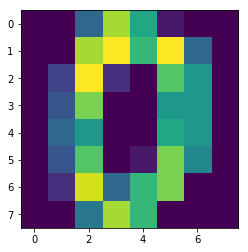

label:  0


In [104]:
plt.imshow(data.images[0])    # show first number in the dataset
plt.show()
print('label: ', data.target[0])    # label = '0'

In [92]:
X_data = data.images
y_data = data.target

In [93]:
# shape of data
print(X_data.shape)    # (8 X 8) format
print(y_data.shape)    

(1797, 8, 8)
(1797,)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 777)

In [95]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 8, 8)
(360, 8, 8)
(1437,)
(360,)


### 1. Simple RNN model
- Simple RNN model with only one vanilla RNN layer

In [110]:
def simple_rnn_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(SimpleRNN(10, input_shape = (8,8)))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model  

In [111]:
simple_rnn_model = KerasClassifier(build_fn = simple_rnn_model, epochs = 100, batch_size = 25, verbose = 1)

In [112]:
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 777)    # 10-fold cross validation

In [113]:
# cross validate the results
results = cross_val_score(simple_rnn_model, X_train, y_train, cv = kfold)

Epoch 1/100
1290/1290 [==============================] - 0s - loss: 2.3572 - acc: 0.1457     
Epoch 2/100
1290/1290 [==============================] - 0s - loss: 1.9257 - acc: 0.3295     
Epoch 3/100
1290/1290 [==============================] - 0s - loss: 1.7875 - acc: 0.4465     
Epoch 4/100
1290/1290 [==============================] - 0s - loss: 1.6954 - acc: 0.4744     
Epoch 5/100
1290/1290 [==============================] - 0s - loss: 1.6370 - acc: 0.5047     
Epoch 6/100
1290/1290 [==============================] - 0s - loss: 1.6053 - acc: 0.5062     
Epoch 7/100
1290/1290 [==============================] - 0s - loss: 1.5524 - acc: 0.5372     
Epoch 8/100
1290/1290 [==============================] - 0s - loss: 1.5611 - acc: 0.5349     
Epoch 9/100
1290/1290 [==============================] - 0s - loss: 1.5204 - acc: 0.5488     
Epoch 10/100
1290/1290 [==============================] - 0s - loss: 1.5097 - acc: 0.5481     
Epoch 11/100
1290/1290 [==============================] - 0

1290/1290 [==============================] - 0s - loss: 1.3240 - acc: 0.6186     
Epoch 87/100
1290/1290 [==============================] - 0s - loss: 1.3359 - acc: 0.6233     
Epoch 88/100
1290/1290 [==============================] - 0s - loss: 1.3744 - acc: 0.6178     
Epoch 89/100
1290/1290 [==============================] - 0s - loss: 1.4530 - acc: 0.5698     
Epoch 90/100
1290/1290 [==============================] - 0s - loss: 1.4339 - acc: 0.5682     
Epoch 91/100
1290/1290 [==============================] - 0s - loss: 1.4251 - acc: 0.5977     
Epoch 92/100
1290/1290 [==============================] - 0s - loss: 1.3599 - acc: 0.6163     
Epoch 93/100
1290/1290 [==============================] - 0s - loss: 1.3443 - acc: 0.6256     
Epoch 94/100
1290/1290 [==============================] - 0s - loss: 1.3496 - acc: 0.6271     
Epoch 95/100
1290/1290 [==============================] - 0s - loss: 1.3318 - acc: 0.6209     
Epoch 96/100
1290/1290 [==============================] - 0s - 

1290/1290 [==============================] - 0s - loss: 1.6766 - acc: 0.4620     
Epoch 72/100
1290/1290 [==============================] - 0s - loss: 1.6802 - acc: 0.4605     
Epoch 73/100
1290/1290 [==============================] - 0s - loss: 1.6674 - acc: 0.4581     
Epoch 74/100
1290/1290 [==============================] - 0s - loss: 1.6597 - acc: 0.4659     
Epoch 75/100
1290/1290 [==============================] - 0s - loss: 1.6595 - acc: 0.4729     
Epoch 76/100
1290/1290 [==============================] - 0s - loss: 1.6527 - acc: 0.4643     
Epoch 77/100
1290/1290 [==============================] - 0s - loss: 1.6549 - acc: 0.4767     
Epoch 78/100
1290/1290 [==============================] - 0s - loss: 1.6559 - acc: 0.4659     
Epoch 79/100
1290/1290 [==============================] - 0s - loss: 1.6511 - acc: 0.4721     
Epoch 80/100
1290/1290 [==============================] - 0s - loss: 1.6785 - acc: 0.4674     
Epoch 81/100
1290/1290 [==============================] - 0s - 

1291/1291 [==============================] - 0s - loss: 1.7087 - acc: 0.4090     
Epoch 57/100
1291/1291 [==============================] - 0s - loss: 1.7097 - acc: 0.3981     
Epoch 58/100
1291/1291 [==============================] - 0s - loss: 1.7158 - acc: 0.3935     
Epoch 59/100
1291/1291 [==============================] - 0s - loss: 1.7114 - acc: 0.3997     
Epoch 60/100
1291/1291 [==============================] - 0s - loss: 1.7384 - acc: 0.3888     
Epoch 61/100
1291/1291 [==============================] - 0s - loss: 1.7493 - acc: 0.3943     
Epoch 62/100
1291/1291 [==============================] - 0s - loss: 1.7248 - acc: 0.3943     
Epoch 63/100
1291/1291 [==============================] - 0s - loss: 1.7041 - acc: 0.4059     
Epoch 64/100
1291/1291 [==============================] - 0s - loss: 1.7142 - acc: 0.4129     
Epoch 65/100
1291/1291 [==============================] - 0s - loss: 1.7332 - acc: 0.3881     
Epoch 66/100
1291/1291 [==============================] - 0s - 

1291/1291 [==============================] - 0s - loss: 1.4780 - acc: 0.5593     
Epoch 42/100
1291/1291 [==============================] - 0s - loss: 1.4375 - acc: 0.5933     
Epoch 43/100
1291/1291 [==============================] - 0s - loss: 1.4309 - acc: 0.5902     
Epoch 44/100
1291/1291 [==============================] - 0s - loss: 1.4034 - acc: 0.6181     
Epoch 45/100
1291/1291 [==============================] - 0s - loss: 1.5075 - acc: 0.5577     
Epoch 46/100
1291/1291 [==============================] - 0s - loss: 1.4361 - acc: 0.6034     
Epoch 47/100
1291/1291 [==============================] - 0s - loss: 1.4272 - acc: 0.6057     
Epoch 48/100
1291/1291 [==============================] - 0s - loss: 1.4201 - acc: 0.6096     
Epoch 49/100
1291/1291 [==============================] - 0s - loss: 1.4506 - acc: 0.5871     
Epoch 50/100
1291/1291 [==============================] - 0s - loss: 1.4572 - acc: 0.5871     
Epoch 51/100
1291/1291 [==============================] - 0s - 

1292/1292 [==============================] - 0s - loss: 1.4508 - acc: 0.5882     
Epoch 27/100
1292/1292 [==============================] - 0s - loss: 1.4724 - acc: 0.5913     
Epoch 28/100
1292/1292 [==============================] - 0s - loss: 1.4665 - acc: 0.5743     
Epoch 29/100
1292/1292 [==============================] - 0s - loss: 1.4750 - acc: 0.5851     
Epoch 30/100
1292/1292 [==============================] - 0s - loss: 1.4737 - acc: 0.5836     
Epoch 31/100
1292/1292 [==============================] - 0s - loss: 1.4331 - acc: 0.6068     
Epoch 32/100
1292/1292 [==============================] - 0s - loss: 1.4364 - acc: 0.5991     
Epoch 33/100
1292/1292 [==============================] - 0s - loss: 1.4313 - acc: 0.5906     
Epoch 34/100
1292/1292 [==============================] - 0s - loss: 1.4256 - acc: 0.6138     
Epoch 35/100
1292/1292 [==============================] - 0s - loss: 1.4883 - acc: 0.5789     
Epoch 36/100
1292/1292 [==============================] - 0s - 

1294/1294 [==============================] - 0s - loss: 1.7894 - acc: 0.4165     
Epoch 12/100
1294/1294 [==============================] - 0s - loss: 1.7898 - acc: 0.4204     
Epoch 13/100
1294/1294 [==============================] - 0s - loss: 1.7813 - acc: 0.4405     
Epoch 14/100
1294/1294 [==============================] - 0s - loss: 1.7793 - acc: 0.4428     
Epoch 15/100
1294/1294 [==============================] - 0s - loss: 1.8016 - acc: 0.4212     
Epoch 16/100
1294/1294 [==============================] - 0s - loss: 1.8032 - acc: 0.4351     
Epoch 17/100
1294/1294 [==============================] - 0s - loss: 1.7587 - acc: 0.4490     
Epoch 18/100
1294/1294 [==============================] - 0s - loss: 1.7547 - acc: 0.4544     
Epoch 19/100
1294/1294 [==============================] - 0s - loss: 1.6907 - acc: 0.4923     
Epoch 20/100
1294/1294 [==============================] - 0s - loss: 1.6901 - acc: 0.4977     
Epoch 21/100
1294/1294 [==============================] - 0s - 

1294/1294 [==============================] - 0s - loss: 1.4915 - acc: 0.5556     
Epoch 98/100
1294/1294 [==============================] - 0s - loss: 1.5436 - acc: 0.5402     
Epoch 99/100
1294/1294 [==============================] - 0s - loss: 1.5239 - acc: 0.5464     
Epoch 100/100
1296/1296 [==============================] - 0s - loss: 2.3534 - acc: 0.0517     
Epoch 2/100
1296/1296 [==============================] - 0s - loss: 2.1836 - acc: 0.0972     
Epoch 3/100
1296/1296 [==============================] - 0s - loss: 1.9734 - acc: 0.2299     
Epoch 4/100
1296/1296 [==============================] - 0s - loss: 1.8260 - acc: 0.3179     
Epoch 5/100
1296/1296 [==============================] - 0s - loss: 1.7572 - acc: 0.3526     
Epoch 6/100
1296/1296 [==============================] - 0s - loss: 1.7054 - acc: 0.3804     
Epoch 7/100
1296/1296 [==============================] - 0s - loss: 1.6874 - acc: 0.4306     
Epoch 8/100
1296/1296 [==============================] - 0s - loss: 

1296/1296 [==============================] - 0s - loss: 1.4048 - acc: 0.6427     
Epoch 82/100
1296/1296 [==============================] - 0s - loss: 1.3928 - acc: 0.6512     
Epoch 83/100
1296/1296 [==============================] - 0s - loss: 1.4461 - acc: 0.6258     
Epoch 84/100
1296/1296 [==============================] - 0s - loss: 1.4398 - acc: 0.6343     
Epoch 85/100
1296/1296 [==============================] - 0s - loss: 1.4658 - acc: 0.5972     
Epoch 86/100
1296/1296 [==============================] - 0s - loss: 1.4173 - acc: 0.6520     
Epoch 87/100
1296/1296 [==============================] - 0s - loss: 1.3965 - acc: 0.6458     
Epoch 88/100
1296/1296 [==============================] - 0s - loss: 1.3854 - acc: 0.6497     
Epoch 89/100
1296/1296 [==============================] - 0s - loss: 1.3838 - acc: 0.6512     
Epoch 90/100
1296/1296 [==============================] - 0s - loss: 1.3994 - acc: 0.6512     
Epoch 91/100
1296/1296 [==============================] - 0s - 

1296/1296 [==============================] - 0s - loss: 1.4723 - acc: 0.5363     
Epoch 67/100
1296/1296 [==============================] - 0s - loss: 1.4432 - acc: 0.5347     
Epoch 68/100
1296/1296 [==============================] - 0s - loss: 1.4659 - acc: 0.5332     
Epoch 69/100
1296/1296 [==============================] - 0s - loss: 1.4905 - acc: 0.5139     
Epoch 70/100
1296/1296 [==============================] - 0s - loss: 1.5312 - acc: 0.5123     
Epoch 71/100
1296/1296 [==============================] - 0s - loss: 1.4669 - acc: 0.5355     
Epoch 72/100
1296/1296 [==============================] - 0s - loss: 1.4819 - acc: 0.5239     
Epoch 73/100
1296/1296 [==============================] - 0s - loss: 1.5164 - acc: 0.5139     
Epoch 74/100
1296/1296 [==============================] - 0s - loss: 1.6115 - acc: 0.5231     
Epoch 75/100
1296/1296 [==============================] - 0s - loss: 1.7001 - acc: 0.4198     
Epoch 76/100
1296/1296 [==============================] - 0s - 

1296/1296 [==============================] - 0s - loss: 1.6756 - acc: 0.5162     
Epoch 52/100
1296/1296 [==============================] - 0s - loss: 1.6678 - acc: 0.5201     
Epoch 53/100
1296/1296 [==============================] - 0s - loss: 1.6699 - acc: 0.5193     
Epoch 54/100
1296/1296 [==============================] - 0s - loss: 1.6721 - acc: 0.5139     
Epoch 55/100
1296/1296 [==============================] - 0s - loss: 1.6627 - acc: 0.5255     
Epoch 56/100
1296/1296 [==============================] - 0s - loss: 1.7001 - acc: 0.5077     
Epoch 57/100
1296/1296 [==============================] - 0s - loss: 1.6547 - acc: 0.5224     
Epoch 58/100
1296/1296 [==============================] - 0s - loss: 1.6777 - acc: 0.5069     
Epoch 59/100
1296/1296 [==============================] - 0s - loss: 1.6400 - acc: 0.5324     
Epoch 60/100
1296/1296 [==============================] - 0s - loss: 1.6584 - acc: 0.5255     
Epoch 61/100
1296/1296 [==============================] - 0s - 

1297/1297 [==============================] - 0s - loss: 1.9178 - acc: 0.3331     
Epoch 37/100
1297/1297 [==============================] - 0s - loss: 1.9064 - acc: 0.3377     
Epoch 38/100
1297/1297 [==============================] - 0s - loss: 1.9017 - acc: 0.3308     
Epoch 39/100
1297/1297 [==============================] - 0s - loss: 1.9126 - acc: 0.3331     
Epoch 40/100
1297/1297 [==============================] - 0s - loss: 1.9056 - acc: 0.3346     
Epoch 41/100
1297/1297 [==============================] - 0s - loss: 1.9001 - acc: 0.3292     
Epoch 42/100
1297/1297 [==============================] - 0s - loss: 1.9012 - acc: 0.3277     
Epoch 43/100
1297/1297 [==============================] - 0s - loss: 1.9016 - acc: 0.3285     
Epoch 44/100
1297/1297 [==============================] - 0s - loss: 1.8926 - acc: 0.3231     
Epoch 45/100
1297/1297 [==============================] - 0s - loss: 1.8965 - acc: 0.3246     
Epoch 46/100
1297/1297 [==============================] - 0s - 

In [114]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.512370629298
0.0877594107786


### 2. Stacked RNN model
- Two-layer vanilla RNN model

In [121]:
def stacked_rnn_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(SimpleRNN(10, return_sequences = True, input_shape = (8,8)))
    model.add(SimpleRNN(10))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model  

In [122]:
stacked_rnn_model = KerasClassifier(build_fn = stacked_rnn_model, epochs = 100, batch_size = 25, verbose = 1)

In [123]:
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 777)    # 10-fold cross validation

In [124]:
# cross validate the results
results = cross_val_score(stacked_rnn_model, X_train, y_train, cv = kfold)

Epoch 1/100
1290/1290 [==============================] - 1s - loss: 2.0697 - acc: 0.3047     
Epoch 2/100
1290/1290 [==============================] - 0s - loss: 1.6944 - acc: 0.5519     
Epoch 3/100
1290/1290 [==============================] - 0s - loss: 1.5271 - acc: 0.6349     
Epoch 4/100
1290/1290 [==============================] - 0s - loss: 1.4680 - acc: 0.6411     
Epoch 5/100
1290/1290 [==============================] - 0s - loss: 1.4057 - acc: 0.6729     
Epoch 6/100
1290/1290 [==============================] - 0s - loss: 1.3667 - acc: 0.6798     
Epoch 7/100
1290/1290 [==============================] - 0s - loss: 1.3231 - acc: 0.7163     
Epoch 8/100
1290/1290 [==============================] - 0s - loss: 1.2932 - acc: 0.7171     
Epoch 9/100
1290/1290 [==============================] - 0s - loss: 1.3010 - acc: 0.7140     
Epoch 10/100
1290/1290 [==============================] - 0s - loss: 1.2601 - acc: 0.7426     
Epoch 11/100
1290/1290 [==============================] - 0

1290/1290 [==============================] - 0s - loss: 1.1048 - acc: 0.8217     
Epoch 88/100
1290/1290 [==============================] - 0s - loss: 1.1310 - acc: 0.8147     
Epoch 89/100
1290/1290 [==============================] - 0s - loss: 1.1674 - acc: 0.7860     
Epoch 90/100
1290/1290 [==============================] - 0s - loss: 1.1286 - acc: 0.8116     - ETA: 0s - loss: 1.1217 - acc: 0
Epoch 91/100
1290/1290 [==============================] - 0s - loss: 1.1043 - acc: 0.8171     
Epoch 92/100
1290/1290 [==============================] - 0s - loss: 1.1011 - acc: 0.8171     
Epoch 93/100
1290/1290 [==============================] - 0s - loss: 1.0861 - acc: 0.8194     
Epoch 94/100
1290/1290 [==============================] - 0s - loss: 1.0754 - acc: 0.8271     
Epoch 95/100
1290/1290 [==============================] - 0s - loss: 1.0843 - acc: 0.8202     
Epoch 96/100
1290/1290 [==============================] - 0s - loss: 1.1165 - acc: 0.8016     
Epoch 97/100
1290/1290 [======

1290/1290 [==============================] - 0s - loss: 1.1236 - acc: 0.8217     
Epoch 73/100
1290/1290 [==============================] - 0s - loss: 1.1368 - acc: 0.8271     
Epoch 74/100
1290/1290 [==============================] - 0s - loss: 1.0786 - acc: 0.8581     
Epoch 75/100
1290/1290 [==============================] - 0s - loss: 1.0489 - acc: 0.8713     
Epoch 76/100
1290/1290 [==============================] - 0s - loss: 1.0583 - acc: 0.8674     
Epoch 77/100
1290/1290 [==============================] - 0s - loss: 1.0712 - acc: 0.8574     
Epoch 78/100
1290/1290 [==============================] - 0s - loss: 1.0769 - acc: 0.8442     
Epoch 79/100
1290/1290 [==============================] - 0s - loss: 1.0561 - acc: 0.8612     
Epoch 80/100
1290/1290 [==============================] - 0s - loss: 1.0650 - acc: 0.8473     
Epoch 81/100
1290/1290 [==============================] - 0s - loss: 1.0576 - acc: 0.8698     
Epoch 82/100
1290/1290 [==============================] - 0s - 

1291/1291 [==============================] - 0s - loss: 1.1235 - acc: 0.8048     
Epoch 58/100
1291/1291 [==============================] - 0s - loss: 1.0917 - acc: 0.8149     
Epoch 59/100
1291/1291 [==============================] - 0s - loss: 1.2200 - acc: 0.7405     
Epoch 60/100
1291/1291 [==============================] - 0s - loss: 1.2449 - acc: 0.7142     
Epoch 61/100
1291/1291 [==============================] - 0s - loss: 1.1689 - acc: 0.7800     
Epoch 62/100
1291/1291 [==============================] - 0s - loss: 1.1365 - acc: 0.7862     
Epoch 63/100
1291/1291 [==============================] - 0s - loss: 1.1298 - acc: 0.7916     
Epoch 64/100
1291/1291 [==============================] - 0s - loss: 1.0945 - acc: 0.8009     
Epoch 65/100
1291/1291 [==============================] - 0s - loss: 1.0946 - acc: 0.8033     
Epoch 66/100
1291/1291 [==============================] - 0s - loss: 1.1003 - acc: 0.8156     
Epoch 67/100
1291/1291 [==============================] - 0s - 

1291/1291 [==============================] - 0s - loss: 1.0792 - acc: 0.8412     
Epoch 43/100
1291/1291 [==============================] - 0s - loss: 1.0810 - acc: 0.8404     
Epoch 44/100
1291/1291 [==============================] - 0s - loss: 1.0759 - acc: 0.8373     
Epoch 45/100
1291/1291 [==============================] - 0s - loss: 1.1047 - acc: 0.8265     
Epoch 46/100
1291/1291 [==============================] - 0s - loss: 1.1254 - acc: 0.8095     
Epoch 47/100
1291/1291 [==============================] - 0s - loss: 1.1526 - acc: 0.8040     
Epoch 48/100
1291/1291 [==============================] - 0s - loss: 1.1004 - acc: 0.8226     
Epoch 49/100
1291/1291 [==============================] - 0s - loss: 1.0931 - acc: 0.8164     
Epoch 50/100
1291/1291 [==============================] - 0s - loss: 1.0933 - acc: 0.8319     
Epoch 51/100
1291/1291 [==============================] - 0s - loss: 1.0733 - acc: 0.8389     
Epoch 52/100
1291/1291 [==============================] - 0s - 

1292/1292 [==============================] - 0s - loss: 1.1214 - acc: 0.8266     
Epoch 28/100
1292/1292 [==============================] - 0s - loss: 1.1090 - acc: 0.8189     
Epoch 29/100
1292/1292 [==============================] - 0s - loss: 1.0796 - acc: 0.8576     
Epoch 30/100
1292/1292 [==============================] - 0s - loss: 1.0873 - acc: 0.8545     
Epoch 31/100
1292/1292 [==============================] - 0s - loss: 1.0862 - acc: 0.8452     
Epoch 32/100
1292/1292 [==============================] - 0s - loss: 1.1338 - acc: 0.8111     
Epoch 33/100
1292/1292 [==============================] - 0s - loss: 1.0959 - acc: 0.8429     
Epoch 34/100
1292/1292 [==============================] - 0s - loss: 1.0563 - acc: 0.8661     
Epoch 35/100
1292/1292 [==============================] - 0s - loss: 1.1015 - acc: 0.8235     
Epoch 36/100
1292/1292 [==============================] - 0s - loss: 1.0659 - acc: 0.8529     
Epoch 37/100
1292/1292 [==============================] - 0s - 

1294/1294 [==============================] - 0s - loss: 1.3451 - acc: 0.7063     
Epoch 13/100
1294/1294 [==============================] - 0s - loss: 1.3417 - acc: 0.7141     
Epoch 14/100
1294/1294 [==============================] - 0s - loss: 1.3270 - acc: 0.7148     
Epoch 15/100
1294/1294 [==============================] - 0s - loss: 1.3047 - acc: 0.7179     
Epoch 16/100
1294/1294 [==============================] - 0s - loss: 1.2987 - acc: 0.7241     
Epoch 17/100
1294/1294 [==============================] - 0s - loss: 1.2680 - acc: 0.7427     
Epoch 18/100
1294/1294 [==============================] - 0s - loss: 1.2559 - acc: 0.7612     
Epoch 19/100
1294/1294 [==============================] - 0s - loss: 1.2746 - acc: 0.7403     
Epoch 20/100
1294/1294 [==============================] - 0s - loss: 1.2737 - acc: 0.7504     
Epoch 21/100
1294/1294 [==============================] - 0s - loss: 1.2636 - acc: 0.7396     
Epoch 22/100
1294/1294 [==============================] - 0s - 

1294/1294 [==============================] - 0s - loss: 1.1822 - acc: 0.7937     
Epoch 99/100
1294/1294 [==============================] - 0s - loss: 1.2112 - acc: 0.7635     
Epoch 100/100
1296/1296 [==============================] - 1s - loss: 2.1449 - acc: 0.1381     
Epoch 2/100
1296/1296 [==============================] - 0s - loss: 1.7830 - acc: 0.4267     
Epoch 3/100
1296/1296 [==============================] - 0s - loss: 1.6046 - acc: 0.5872     
Epoch 4/100
1296/1296 [==============================] - 0s - loss: 1.5099 - acc: 0.6389     
Epoch 5/100
1296/1296 [==============================] - 0s - loss: 1.4384 - acc: 0.6821     
Epoch 6/100
1296/1296 [==============================] - 0s - loss: 1.3837 - acc: 0.6998     
Epoch 7/100
1296/1296 [==============================] - 0s - loss: 1.3368 - acc: 0.7315     
Epoch 8/100
1296/1296 [==============================] - 0s - loss: 1.2846 - acc: 0.7716     
Epoch 9/100
1296/1296 [==============================] - 0s - loss: 1

1296/1296 [==============================] - 0s - loss: 1.0998 - acc: 0.8488     
Epoch 84/100
1296/1296 [==============================] - 0s - loss: 1.1016 - acc: 0.8441     
Epoch 85/100
1296/1296 [==============================] - 0s - loss: 1.0641 - acc: 0.8580     
Epoch 86/100
1296/1296 [==============================] - 0s - loss: 1.0655 - acc: 0.8542     
Epoch 87/100
1296/1296 [==============================] - 0s - loss: 1.0364 - acc: 0.8873     
Epoch 88/100
1296/1296 [==============================] - 0s - loss: 1.0232 - acc: 0.8881     
Epoch 89/100
1296/1296 [==============================] - 0s - loss: 1.0458 - acc: 0.8727     
Epoch 90/100
1296/1296 [==============================] - 0s - loss: 1.0371 - acc: 0.8688     
Epoch 91/100
1296/1296 [==============================] - 0s - loss: 1.0282 - acc: 0.8750     
Epoch 92/100
1296/1296 [==============================] - 0s - loss: 1.0852 - acc: 0.8472     
Epoch 93/100
1296/1296 [==============================] - 0s - 

1296/1296 [==============================] - 0s - loss: 1.1249 - acc: 0.8503     
Epoch 69/100
1296/1296 [==============================] - 0s - loss: 1.0896 - acc: 0.8534     
Epoch 70/100
1296/1296 [==============================] - 0s - loss: 1.0861 - acc: 0.8596     
Epoch 71/100
1296/1296 [==============================] - 0s - loss: 1.0897 - acc: 0.8696     
Epoch 72/100
1296/1296 [==============================] - 0s - loss: 1.0909 - acc: 0.8488     
Epoch 73/100
1296/1296 [==============================] - 0s - loss: 1.0878 - acc: 0.8534     
Epoch 74/100
1296/1296 [==============================] - 0s - loss: 1.0886 - acc: 0.8642     
Epoch 75/100
1296/1296 [==============================] - 0s - loss: 1.0520 - acc: 0.8889     
Epoch 76/100
1296/1296 [==============================] - 0s - loss: 1.0882 - acc: 0.8634     
Epoch 77/100
1296/1296 [==============================] - 0s - loss: 1.0825 - acc: 0.8650     
Epoch 78/100
1296/1296 [==============================] - 0s - 

1296/1296 [==============================] - 0s - loss: 1.0436 - acc: 0.8627     
Epoch 54/100
1296/1296 [==============================] - 0s - loss: 1.0583 - acc: 0.8534     
Epoch 55/100
1296/1296 [==============================] - 0s - loss: 1.0753 - acc: 0.8395     
Epoch 56/100
1296/1296 [==============================] - 0s - loss: 1.1104 - acc: 0.8426     
Epoch 57/100
1296/1296 [==============================] - 0s - loss: 1.0931 - acc: 0.8426     
Epoch 58/100
1296/1296 [==============================] - 0s - loss: 1.1064 - acc: 0.8380     
Epoch 59/100
1296/1296 [==============================] - 0s - loss: 1.0710 - acc: 0.8380     
Epoch 60/100
1296/1296 [==============================] - 0s - loss: 1.1010 - acc: 0.8372     
Epoch 61/100
1296/1296 [==============================] - 0s - loss: 1.0858 - acc: 0.8449     
Epoch 62/100
1296/1296 [==============================] - 0s - loss: 1.1950 - acc: 0.7562     
Epoch 63/100
1296/1296 [==============================] - 0s - 

1297/1297 [==============================] - 0s - loss: 1.1577 - acc: 0.7818     
Epoch 39/100
1297/1297 [==============================] - 0s - loss: 1.1264 - acc: 0.8096     
Epoch 40/100
1297/1297 [==============================] - 0s - loss: 1.1203 - acc: 0.8103     
Epoch 41/100
1297/1297 [==============================] - 0s - loss: 1.1017 - acc: 0.8304     
Epoch 42/100
1297/1297 [==============================] - 0s - loss: 1.0969 - acc: 0.8258     
Epoch 43/100
1297/1297 [==============================] - 0s - loss: 1.0810 - acc: 0.8358     
Epoch 44/100
1297/1297 [==============================] - 0s - loss: 1.0682 - acc: 0.8365     
Epoch 45/100
1297/1297 [==============================] - 0s - loss: 1.0872 - acc: 0.8396     
Epoch 46/100
1297/1297 [==============================] - 0s - loss: 1.1383 - acc: 0.8126     
Epoch 47/100
1297/1297 [==============================] - 0s - loss: 1.1364 - acc: 0.8096     
Epoch 48/100
1297/1297 [==============================] - 0s - 

In [125]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.782629487682
0.0443044186784


### 3. Bidirectional RNN model
- RNN model with one bi-directional layer
- As there are actually two hidden layers in a bi-directional layer, the number of units of a RNN neuron should be halved

In [151]:
def bidirectional_rnn_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(Bidirectional(SimpleRNN(5, return_sequences = False), input_shape = (8,8)))    # number of output units is halved
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model  

In [152]:
bidirectional_rnn_model = KerasClassifier(build_fn = bidirectional_rnn_model, epochs = 100, batch_size = 25, verbose = 1)

In [153]:
# cross validate the results
results = cross_val_score(bidirectional_rnn_model, X_train, y_train, cv = kfold)

Epoch 1/100
1290/1290 [==============================] - 3s - loss: 2.2138 - acc: 0.1062     
Epoch 2/100
1290/1290 [==============================] - 0s - loss: 2.0841 - acc: 0.1357     
Epoch 3/100
1290/1290 [==============================] - 0s - loss: 1.9822 - acc: 0.1729     
Epoch 4/100
1290/1290 [==============================] - 0s - loss: 1.8908 - acc: 0.2000     
Epoch 5/100
1290/1290 [==============================] - 0s - loss: 1.8318 - acc: 0.2155     
Epoch 6/100
1290/1290 [==============================] - 0s - loss: 1.7929 - acc: 0.2333     
Epoch 7/100
1290/1290 [==============================] - 0s - loss: 1.7543 - acc: 0.2457     
Epoch 8/100
1290/1290 [==============================] - 0s - loss: 1.7548 - acc: 0.2589     
Epoch 9/100
1290/1290 [==============================] - 0s - loss: 1.7420 - acc: 0.2783     
Epoch 10/100
1290/1290 [==============================] - 0s - loss: 1.7332 - acc: 0.2736     
Epoch 11/100
1290/1290 [==============================] - 0

1290/1290 [==============================] - 0s - loss: 1.4660 - acc: 0.5744     
Epoch 88/100
1290/1290 [==============================] - 0s - loss: 1.4495 - acc: 0.5713     
Epoch 89/100
1290/1290 [==============================] - 0s - loss: 1.4275 - acc: 0.5736     
Epoch 90/100
1290/1290 [==============================] - 0s - loss: 1.5704 - acc: 0.4938     
Epoch 91/100
1290/1290 [==============================] - 0s - loss: 1.8038 - acc: 0.3527     
Epoch 92/100
1290/1290 [==============================] - 0s - loss: 1.5395 - acc: 0.5039     
Epoch 93/100
1290/1290 [==============================] - 0s - loss: 1.4740 - acc: 0.5659     
Epoch 94/100
1290/1290 [==============================] - 0s - loss: 1.4847 - acc: 0.5698     
Epoch 95/100
1290/1290 [==============================] - 0s - loss: 1.4198 - acc: 0.5938     
Epoch 96/100
1290/1290 [==============================] - 0s - loss: 1.4254 - acc: 0.5868     
Epoch 97/100
1290/1290 [==============================] - 0s - 

1290/1290 [==============================] - 0s - loss: 2.0351 - acc: 0.2736     
Epoch 73/100
1290/1290 [==============================] - 0s - loss: 2.0277 - acc: 0.2713     
Epoch 74/100
1290/1290 [==============================] - 0s - loss: 2.0343 - acc: 0.2705     
Epoch 75/100
1290/1290 [==============================] - 0s - loss: 2.0318 - acc: 0.2705     
Epoch 76/100
1290/1290 [==============================] - 0s - loss: 2.0293 - acc: 0.2705     
Epoch 77/100
1290/1290 [==============================] - 0s - loss: 2.0306 - acc: 0.2705     
Epoch 78/100
1290/1290 [==============================] - 0s - loss: 2.0264 - acc: 0.2721     
Epoch 79/100
1290/1290 [==============================] - 0s - loss: 2.0310 - acc: 0.2705     
Epoch 80/100
1290/1290 [==============================] - 0s - loss: 2.0334 - acc: 0.2705     
Epoch 81/100
1290/1290 [==============================] - 0s - loss: 2.0276 - acc: 0.2729     
Epoch 82/100
1290/1290 [==============================] - 0s - 

1291/1291 [==============================] - 0s - loss: 1.7942 - acc: 0.4353     
Epoch 58/100
1291/1291 [==============================] - 0s - loss: 1.7895 - acc: 0.4392     
Epoch 59/100
1291/1291 [==============================] - 0s - loss: 1.7967 - acc: 0.4307     
Epoch 60/100
1291/1291 [==============================] - 0s - loss: 1.7984 - acc: 0.4345     
Epoch 61/100
1291/1291 [==============================] - 0s - loss: 1.7936 - acc: 0.4338     
Epoch 62/100
1291/1291 [==============================] - 0s - loss: 1.7934 - acc: 0.4322     
Epoch 63/100
1291/1291 [==============================] - 0s - loss: 1.7918 - acc: 0.4423     
Epoch 64/100
1291/1291 [==============================] - 0s - loss: 1.8361 - acc: 0.4167     
Epoch 65/100
1291/1291 [==============================] - 0s - loss: 2.0377 - acc: 0.2804     
Epoch 66/100
1291/1291 [==============================] - 0s - loss: 1.9925 - acc: 0.3269     
Epoch 67/100
1291/1291 [==============================] - 0s - 

1291/1291 [==============================] - 0s - loss: 1.5747 - acc: 0.4818     
Epoch 43/100
1291/1291 [==============================] - 0s - loss: 1.5123 - acc: 0.5554     
Epoch 44/100
1291/1291 [==============================] - 0s - loss: 1.4661 - acc: 0.5709     
Epoch 45/100
1291/1291 [==============================] - 0s - loss: 1.4578 - acc: 0.5833     
Epoch 46/100
1291/1291 [==============================] - 0s - loss: 1.4462 - acc: 0.5763     
Epoch 47/100
1291/1291 [==============================] - 0s - loss: 1.4506 - acc: 0.5825     
Epoch 48/100
1291/1291 [==============================] - 0s - loss: 1.4317 - acc: 0.5840     
Epoch 49/100
1291/1291 [==============================] - 0s - loss: 1.4766 - acc: 0.5531     
Epoch 50/100
1291/1291 [==============================] - 0s - loss: 1.4296 - acc: 0.5794     
Epoch 51/100
1291/1291 [==============================] - 0s - loss: 1.4389 - acc: 0.5802     
Epoch 52/100
1291/1291 [==============================] - 0s - 

1292/1292 [==============================] - 0s - loss: 1.8627 - acc: 0.3382     
Epoch 28/100
1292/1292 [==============================] - 0s - loss: 1.7896 - acc: 0.3971     
Epoch 29/100
1292/1292 [==============================] - 0s - loss: 1.7819 - acc: 0.3986     
Epoch 30/100
1292/1292 [==============================] - 0s - loss: 1.8013 - acc: 0.3785     
Epoch 31/100
1292/1292 [==============================] - 0s - loss: 1.7809 - acc: 0.3924     
Epoch 32/100
1292/1292 [==============================] - 0s - loss: 1.7744 - acc: 0.4063     
Epoch 33/100
1292/1292 [==============================] - 0s - loss: 1.7737 - acc: 0.3847     
Epoch 34/100
1292/1292 [==============================] - 0s - loss: 1.7739 - acc: 0.4071     
Epoch 35/100
1292/1292 [==============================] - 0s - loss: 1.8030 - acc: 0.4218     
Epoch 36/100
1292/1292 [==============================] - 0s - loss: 1.7527 - acc: 0.4195     
Epoch 37/100
1292/1292 [==============================] - 0s - 

1294/1294 [==============================] - 0s - loss: 1.8155 - acc: 0.4405     
Epoch 13/100
1294/1294 [==============================] - 0s - loss: 1.8100 - acc: 0.4405     
Epoch 14/100
1294/1294 [==============================] - 0s - loss: 1.8124 - acc: 0.4413     
Epoch 15/100
1294/1294 [==============================] - 0s - loss: 1.8227 - acc: 0.4405     
Epoch 16/100
1294/1294 [==============================] - 0s - loss: 1.8093 - acc: 0.4490     
Epoch 17/100
1294/1294 [==============================] - 0s - loss: 1.8016 - acc: 0.4521     
Epoch 18/100
1294/1294 [==============================] - 0s - loss: 1.7983 - acc: 0.4560     
Epoch 19/100
1294/1294 [==============================] - 0s - loss: 1.7884 - acc: 0.4560     
Epoch 20/100
1294/1294 [==============================] - 0s - loss: 1.7957 - acc: 0.4652     
Epoch 21/100
1294/1294 [==============================] - 0s - loss: 1.7866 - acc: 0.4590     
Epoch 22/100
1294/1294 [==============================] - 0s - 

1294/1294 [==============================] - 0s - loss: 1.8008 - acc: 0.4297     
Epoch 99/100
1294/1294 [==============================] - 0s - loss: 1.7844 - acc: 0.4343     
Epoch 100/100
1296/1296 [==============================] - 3s - loss: 2.5500 - acc: 0.1227     
Epoch 2/100
1296/1296 [==============================] - 0s - loss: 2.3084 - acc: 0.1057     
Epoch 3/100
1296/1296 [==============================] - 0s - loss: 2.1837 - acc: 0.1350     
Epoch 4/100
1296/1296 [==============================] - 0s - loss: 2.1080 - acc: 0.1705     
Epoch 5/100
1296/1296 [==============================] - 0s - loss: 2.0736 - acc: 0.1968     
Epoch 6/100
1296/1296 [==============================] - 0s - loss: 2.0282 - acc: 0.2315     
Epoch 7/100
1296/1296 [==============================] - 0s - loss: 2.0012 - acc: 0.2878     
Epoch 8/100
1296/1296 [==============================] - 0s - loss: 1.9425 - acc: 0.3380     
Epoch 9/100
1296/1296 [==============================] - 0s - loss: 1

1296/1296 [==============================] - 0s - loss: 1.7861 - acc: 0.4059     
Epoch 84/100
1296/1296 [==============================] - 0s - loss: 1.7882 - acc: 0.4236     
Epoch 85/100
1296/1296 [==============================] - 0s - loss: 1.7876 - acc: 0.4005     
Epoch 86/100
1296/1296 [==============================] - 0s - loss: 1.8021 - acc: 0.3981     
Epoch 87/100
1296/1296 [==============================] - 0s - loss: 1.7821 - acc: 0.4190     
Epoch 88/100
1296/1296 [==============================] - 0s - loss: 1.8075 - acc: 0.3966     
Epoch 89/100
1296/1296 [==============================] - 0s - loss: 1.7784 - acc: 0.4128     
Epoch 90/100
1296/1296 [==============================] - 0s - loss: 1.7869 - acc: 0.4120     
Epoch 91/100
1296/1296 [==============================] - 0s - loss: 1.7800 - acc: 0.4120     
Epoch 92/100
1296/1296 [==============================] - 0s - loss: 1.8063 - acc: 0.4043     
Epoch 93/100
1296/1296 [==============================] - 0s - 

1296/1296 [==============================] - 0s - loss: 1.5719 - acc: 0.5702     
Epoch 69/100
1296/1296 [==============================] - 0s - loss: 1.5492 - acc: 0.5849     
Epoch 70/100
1296/1296 [==============================] - 0s - loss: 1.5396 - acc: 0.5880     
Epoch 71/100
1296/1296 [==============================] - 0s - loss: 1.5699 - acc: 0.5710     
Epoch 72/100
1296/1296 [==============================] - 0s - loss: 1.5536 - acc: 0.5841     
Epoch 73/100
1296/1296 [==============================] - 0s - loss: 1.5651 - acc: 0.5718     
Epoch 74/100
1296/1296 [==============================] - 0s - loss: 1.5909 - acc: 0.5478     
Epoch 75/100
1296/1296 [==============================] - 0s - loss: 1.5481 - acc: 0.5856     
Epoch 76/100
1296/1296 [==============================] - 0s - loss: 1.5802 - acc: 0.5471     
Epoch 77/100
1296/1296 [==============================] - 0s - loss: 1.5426 - acc: 0.5795     
Epoch 78/100
1296/1296 [==============================] - 0s - 

1296/1296 [==============================] - 0s - loss: 1.5374 - acc: 0.5625     
Epoch 54/100
1296/1296 [==============================] - 0s - loss: 1.5110 - acc: 0.5972     
Epoch 55/100
1296/1296 [==============================] - 0s - loss: 1.5088 - acc: 0.5802     
Epoch 56/100
1296/1296 [==============================] - 0s - loss: 1.5224 - acc: 0.5640     
Epoch 57/100
1296/1296 [==============================] - 0s - loss: 1.5325 - acc: 0.5810     
Epoch 58/100
1296/1296 [==============================] - 0s - loss: 1.4945 - acc: 0.5856     
Epoch 59/100
1296/1296 [==============================] - 0s - loss: 1.5395 - acc: 0.5718     
Epoch 60/100
1296/1296 [==============================] - 0s - loss: 1.5375 - acc: 0.5517     
Epoch 61/100
1296/1296 [==============================] - 0s - loss: 1.5451 - acc: 0.5556     
Epoch 62/100
1296/1296 [==============================] - 0s - loss: 1.4983 - acc: 0.5725     
Epoch 63/100
1296/1296 [==============================] - 0s - 

1297/1297 [==============================] - 0s - loss: 1.4319 - acc: 0.5729     
Epoch 39/100
1297/1297 [==============================] - 0s - loss: 1.5003 - acc: 0.5328     
Epoch 40/100
1297/1297 [==============================] - 0s - loss: 1.4824 - acc: 0.5443     
Epoch 41/100
1297/1297 [==============================] - 0s - loss: 1.6385 - acc: 0.5127     
Epoch 42/100
1297/1297 [==============================] - 0s - loss: 1.5958 - acc: 0.4965     
Epoch 43/100
1297/1297 [==============================] - 0s - loss: 1.5049 - acc: 0.5412     
Epoch 44/100
1297/1297 [==============================] - 0s - loss: 1.4908 - acc: 0.5713     
Epoch 45/100
1297/1297 [==============================] - 0s - loss: 1.4814 - acc: 0.5490     
Epoch 46/100
1297/1297 [==============================] - 0s - loss: 1.4565 - acc: 0.5775     
Epoch 47/100
1297/1297 [==============================] - 0s - loss: 1.4317 - acc: 0.5852     
Epoch 48/100
1297/1297 [==============================] - 0s - 

In [154]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.455588528752
0.105806469411


### 4. Simple LSTM model
- LSTM model with one layer

In [127]:
def simple_lstm_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(LSTM(10, return_sequences = False, input_shape = (8,8)))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model  

In [128]:
simple_lstm_model = KerasClassifier(build_fn = simple_lstm_model, epochs = 100, batch_size = 25, verbose = 1)

In [129]:
# cross validate the results
results = cross_val_score(simple_lstm_model, X_train, y_train, cv = kfold)

Epoch 1/100
1290/1290 [==============================] - 1s - loss: 2.1576 - acc: 0.2054     
Epoch 2/100
1290/1290 [==============================] - 0s - loss: 1.9755 - acc: 0.3326     
Epoch 3/100
1290/1290 [==============================] - 0s - loss: 1.8952 - acc: 0.4023     
Epoch 4/100
1290/1290 [==============================] - 0s - loss: 1.8548 - acc: 0.4481     
Epoch 5/100
1290/1290 [==============================] - 0s - loss: 1.8666 - acc: 0.4124     
Epoch 6/100
1290/1290 [==============================] - 0s - loss: 1.7845 - acc: 0.4341     
Epoch 7/100
1290/1290 [==============================] - 0s - loss: 1.7072 - acc: 0.4597     
Epoch 8/100
1290/1290 [==============================] - 0s - loss: 1.6517 - acc: 0.4651     
Epoch 9/100
1290/1290 [==============================] - 0s - loss: 1.6137 - acc: 0.4767     
Epoch 10/100
1290/1290 [==============================] - 0s - loss: 1.5876 - acc: 0.4853     
Epoch 11/100
1290/1290 [==============================] - 0

1290/1290 [==============================] - 0s - loss: 1.4156 - acc: 0.7388     
Epoch 88/100
1290/1290 [==============================] - 0s - loss: 1.4250 - acc: 0.7364     
Epoch 89/100
1290/1290 [==============================] - 0s - loss: 1.4011 - acc: 0.7465     
Epoch 90/100
1290/1290 [==============================] - 0s - loss: 1.3975 - acc: 0.7543     
Epoch 91/100
1290/1290 [==============================] - 0s - loss: 1.4186 - acc: 0.7302     
Epoch 92/100
1290/1290 [==============================] - 0s - loss: 1.4171 - acc: 0.7473     
Epoch 93/100
1290/1290 [==============================] - 0s - loss: 1.3949 - acc: 0.7589     
Epoch 94/100
1290/1290 [==============================] - 0s - loss: 1.4115 - acc: 0.7349     
Epoch 95/100
1290/1290 [==============================] - 0s - loss: 1.4198 - acc: 0.7271     
Epoch 96/100
1290/1290 [==============================] - 0s - loss: 1.4173 - acc: 0.7341     
Epoch 97/100
1290/1290 [==============================] - 0s - 

1290/1290 [==============================] - 0s - loss: 1.1563 - acc: 0.8829     
Epoch 73/100
1290/1290 [==============================] - 0s - loss: 1.1838 - acc: 0.8519     
Epoch 74/100
1290/1290 [==============================] - 0s - loss: 1.1684 - acc: 0.8628     
Epoch 75/100
1290/1290 [==============================] - 0s - loss: 1.1866 - acc: 0.8566     
Epoch 76/100
1290/1290 [==============================] - 0s - loss: 1.1887 - acc: 0.8512     
Epoch 77/100
1290/1290 [==============================] - 0s - loss: 1.2074 - acc: 0.8349     
Epoch 78/100
1290/1290 [==============================] - 0s - loss: 1.2126 - acc: 0.8147     
Epoch 79/100
1290/1290 [==============================] - 0s - loss: 1.1810 - acc: 0.8543     
Epoch 80/100
1290/1290 [==============================] - 0s - loss: 1.1709 - acc: 0.8620     
Epoch 81/100
1290/1290 [==============================] - 0s - loss: 1.1588 - acc: 0.8736     
Epoch 82/100
1290/1290 [==============================] - 0s - 

1291/1291 [==============================] - 0s - loss: 1.5284 - acc: 0.6390     
Epoch 58/100
1291/1291 [==============================] - 0s - loss: 1.5509 - acc: 0.6166     
Epoch 59/100
1291/1291 [==============================] - 0s - loss: 1.6185 - acc: 0.5755     
Epoch 60/100
1291/1291 [==============================] - 0s - loss: 1.6391 - acc: 0.5453     
Epoch 61/100
1291/1291 [==============================] - 0s - loss: 1.5877 - acc: 0.5817     
Epoch 62/100
1291/1291 [==============================] - 0s - loss: 1.6788 - acc: 0.5438     
Epoch 63/100
1291/1291 [==============================] - 0s - loss: 1.5716 - acc: 0.5980     
Epoch 64/100
1291/1291 [==============================] - 0s - loss: 1.5576 - acc: 0.6119     
Epoch 65/100
1291/1291 [==============================] - 0s - loss: 1.5662 - acc: 0.5980     
Epoch 66/100
1291/1291 [==============================] - 0s - loss: 1.5474 - acc: 0.6135     
Epoch 67/100
1291/1291 [==============================] - 0s - 

1291/1291 [==============================] - 0s - loss: 1.3966 - acc: 0.7622     
Epoch 43/100
1291/1291 [==============================] - 0s - loss: 1.3907 - acc: 0.7614     
Epoch 44/100
1291/1291 [==============================] - 0s - loss: 1.3905 - acc: 0.7506     
Epoch 45/100
1291/1291 [==============================] - 0s - loss: 1.4032 - acc: 0.7506     
Epoch 46/100
1291/1291 [==============================] - 0s - loss: 1.4000 - acc: 0.7459     
Epoch 47/100
1291/1291 [==============================] - 0s - loss: 1.3735 - acc: 0.7622     
Epoch 48/100
1291/1291 [==============================] - 0s - loss: 1.3729 - acc: 0.7599     
Epoch 49/100
1291/1291 [==============================] - 0s - loss: 1.3703 - acc: 0.7637     
Epoch 50/100
1291/1291 [==============================] - 0s - loss: 1.4273 - acc: 0.7211     
Epoch 51/100
1291/1291 [==============================] - 0s - loss: 1.3882 - acc: 0.7514     
Epoch 52/100
1291/1291 [==============================] - 0s - 

1292/1292 [==============================] - 0s - loss: 1.3633 - acc: 0.7740     
Epoch 28/100
1292/1292 [==============================] - 0s - loss: 1.3789 - acc: 0.7724     
Epoch 29/100
1292/1292 [==============================] - 0s - loss: 1.3390 - acc: 0.7980     
Epoch 30/100
1292/1292 [==============================] - 0s - loss: 1.3468 - acc: 0.7902     
Epoch 31/100
1292/1292 [==============================] - 0s - loss: 1.3309 - acc: 0.7957     
Epoch 32/100
1292/1292 [==============================] - 0s - loss: 1.3317 - acc: 0.7949     
Epoch 33/100
1292/1292 [==============================] - 0s - loss: 1.3521 - acc: 0.7794     
Epoch 34/100
1292/1292 [==============================] - 0s - loss: 1.3552 - acc: 0.7802     
Epoch 35/100
1292/1292 [==============================] - 0s - loss: 1.3499 - acc: 0.7817     
Epoch 36/100
1292/1292 [==============================] - 0s - loss: 1.3614 - acc: 0.7701     
Epoch 37/100
1292/1292 [==============================] - 0s - 

1294/1294 [==============================] - 0s - loss: 1.5161 - acc: 0.5889     
Epoch 13/100
1294/1294 [==============================] - 0s - loss: 1.5286 - acc: 0.5657     
Epoch 14/100
1294/1294 [==============================] - 0s - loss: 1.5445 - acc: 0.5896     
Epoch 15/100
1294/1294 [==============================] - 0s - loss: 1.5238 - acc: 0.6113     
Epoch 16/100
1294/1294 [==============================] - 0s - loss: 1.5034 - acc: 0.6291     
Epoch 17/100
1294/1294 [==============================] - 0s - loss: 1.4785 - acc: 0.6445     
Epoch 18/100
1294/1294 [==============================] - 0s - loss: 1.4955 - acc: 0.6306     
Epoch 19/100
1294/1294 [==============================] - 0s - loss: 1.4722 - acc: 0.6600     
Epoch 20/100
1294/1294 [==============================] - 0s - loss: 1.4649 - acc: 0.6700     
Epoch 21/100
1294/1294 [==============================] - 0s - loss: 1.4499 - acc: 0.6731     
Epoch 22/100
1294/1294 [==============================] - 0s - 

1294/1294 [==============================] - 0s - loss: 1.3108 - acc: 0.7767     
Epoch 99/100
1294/1294 [==============================] - 0s - loss: 1.3178 - acc: 0.7589     
Epoch 100/100
1296/1296 [==============================] - 2s - loss: 2.1652 - acc: 0.2068     
Epoch 2/100
1296/1296 [==============================] - 0s - loss: 1.9219 - acc: 0.3133     
Epoch 3/100
1296/1296 [==============================] - 0s - loss: 1.7974 - acc: 0.3935     
Epoch 4/100
1296/1296 [==============================] - 0s - loss: 1.7460 - acc: 0.4182     
Epoch 5/100
1296/1296 [==============================] - 0s - loss: 1.7178 - acc: 0.4637     
Epoch 6/100
1296/1296 [==============================] - 0s - loss: 1.7007 - acc: 0.5332     
Epoch 7/100
1296/1296 [==============================] - 0s - loss: 1.6791 - acc: 0.5532     
Epoch 8/100
1296/1296 [==============================] - 0s - loss: 1.6462 - acc: 0.5841     
Epoch 9/100
1296/1296 [==============================] - 0s - loss: 1

1296/1296 [==============================] - 0s - loss: 1.4070 - acc: 0.7809     
Epoch 84/100
1296/1296 [==============================] - 0s - loss: 1.3995 - acc: 0.7870     
Epoch 85/100
1296/1296 [==============================] - 0s - loss: 1.4184 - acc: 0.7716     
Epoch 86/100
1296/1296 [==============================] - 0s - loss: 1.4198 - acc: 0.7809     
Epoch 87/100
1296/1296 [==============================] - 0s - loss: 1.4122 - acc: 0.7863     
Epoch 88/100
1296/1296 [==============================] - 0s - loss: 1.4194 - acc: 0.7785     
Epoch 89/100
1296/1296 [==============================] - 0s - loss: 1.3987 - acc: 0.7986     
Epoch 90/100
1296/1296 [==============================] - 0s - loss: 1.4034 - acc: 0.7909     
Epoch 91/100
1296/1296 [==============================] - 0s - loss: 1.4045 - acc: 0.7824     
Epoch 92/100
1296/1296 [==============================] - 0s - loss: 1.4018 - acc: 0.7924     
Epoch 93/100
1296/1296 [==============================] - 0s - 

1296/1296 [==============================] - 0s - loss: 1.4150 - acc: 0.7215     
Epoch 69/100
1296/1296 [==============================] - 0s - loss: 1.4199 - acc: 0.7060     
Epoch 70/100
1296/1296 [==============================] - 0s - loss: 1.4271 - acc: 0.7076     
Epoch 71/100
1296/1296 [==============================] - 0s - loss: 1.4104 - acc: 0.7184     
Epoch 72/100
1296/1296 [==============================] - 0s - loss: 1.4131 - acc: 0.7130     
Epoch 73/100
1296/1296 [==============================] - 0s - loss: 1.4294 - acc: 0.7014     
Epoch 74/100
1296/1296 [==============================] - 0s - loss: 1.4414 - acc: 0.7029     
Epoch 75/100
1296/1296 [==============================] - 0s - loss: 1.4111 - acc: 0.7199     
Epoch 76/100
1296/1296 [==============================] - 0s - loss: 1.4037 - acc: 0.7315     
Epoch 77/100
1296/1296 [==============================] - 0s - loss: 1.4233 - acc: 0.7153     
Epoch 78/100
1296/1296 [==============================] - 0s - 

1296/1296 [==============================] - 0s - loss: 1.2607 - acc: 0.7909     
Epoch 54/100
1296/1296 [==============================] - 0s - loss: 1.2584 - acc: 0.7917     
Epoch 55/100
1296/1296 [==============================] - 0s - loss: 1.2134 - acc: 0.8434     
Epoch 56/100
1296/1296 [==============================] - 0s - loss: 1.1815 - acc: 0.8627     
Epoch 57/100
1296/1296 [==============================] - 0s - loss: 1.1798 - acc: 0.8773     
Epoch 58/100
1296/1296 [==============================] - 0s - loss: 1.1858 - acc: 0.8549     
Epoch 59/100
1296/1296 [==============================] - 0s - loss: 1.2088 - acc: 0.8511     
Epoch 60/100
1296/1296 [==============================] - 0s - loss: 1.1958 - acc: 0.8519     
Epoch 61/100
1296/1296 [==============================] - 0s - loss: 1.2071 - acc: 0.8580     
Epoch 62/100
1296/1296 [==============================] - 0s - loss: 1.2045 - acc: 0.8449     
Epoch 63/100
1296/1296 [==============================] - 0s - 

1297/1297 [==============================] - 0s - loss: 1.4910 - acc: 0.6908     
Epoch 39/100
1297/1297 [==============================] - 0s - loss: 1.4782 - acc: 0.6985     
Epoch 40/100
1297/1297 [==============================] - 0s - loss: 1.4735 - acc: 0.7001     
Epoch 41/100
1297/1297 [==============================] - 0s - loss: 1.4731 - acc: 0.7016     
Epoch 42/100
1297/1297 [==============================] - 0s - loss: 1.5287 - acc: 0.6646     
Epoch 43/100
1297/1297 [==============================] - 0s - loss: 1.4906 - acc: 0.6715     
Epoch 44/100
1297/1297 [==============================] - 0s - loss: 1.4645 - acc: 0.7124     
Epoch 45/100
1297/1297 [==============================] - 0s - loss: 1.4829 - acc: 0.6947     
Epoch 46/100
1297/1297 [==============================] - 0s - loss: 1.4565 - acc: 0.7101     
Epoch 47/100
1297/1297 [==============================] - 0s - loss: 1.4592 - acc: 0.7016     
Epoch 48/100
1297/1297 [==============================] - 0s - 

In [130]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.735386777075
0.0757424070027


### 5. Stacked LSTM model
- LSTM model with two layers

In [131]:
def stacked_lstm_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(LSTM(10, return_sequences = True, input_shape = (8,8)))
    model.add(LSTM(10))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model  

In [132]:
stacked_lstm_model = KerasClassifier(build_fn = stacked_lstm_model, epochs = 100, batch_size = 25, verbose = 1)

In [133]:
# cross validate the results
results = cross_val_score(stacked_lstm_model, X_train, y_train, cv = kfold)

Epoch 1/100
1290/1290 [==============================] - 3s - loss: 1.9163 - acc: 0.4155     
Epoch 2/100
1290/1290 [==============================] - 1s - loss: 1.4363 - acc: 0.6357     
Epoch 3/100
1290/1290 [==============================] - 1s - loss: 1.2983 - acc: 0.7713     
Epoch 4/100
1290/1290 [==============================] - 1s - loss: 1.2291 - acc: 0.8023     
Epoch 5/100
1290/1290 [==============================] - 1s - loss: 1.1437 - acc: 0.8868     
Epoch 6/100
1290/1290 [==============================] - 1s - loss: 1.1530 - acc: 0.8736     
Epoch 7/100
1290/1290 [==============================] - 1s - loss: 1.1207 - acc: 0.8860     
Epoch 8/100
1290/1290 [==============================] - 1s - loss: 1.1186 - acc: 0.8775     
Epoch 9/100
1290/1290 [==============================] - 1s - loss: 1.0941 - acc: 0.8984     
Epoch 10/100
1290/1290 [==============================] - 1s - loss: 1.0556 - acc: 0.9233     
Epoch 11/100
1290/1290 [==============================] - 1

1290/1290 [==============================] - 1s - loss: 0.9298 - acc: 0.9713     
Epoch 88/100
1290/1290 [==============================] - 1s - loss: 0.9466 - acc: 0.9558     
Epoch 89/100
1290/1290 [==============================] - 1s - loss: 0.9242 - acc: 0.9760     
Epoch 90/100
1290/1290 [==============================] - 1s - loss: 0.9664 - acc: 0.9543     
Epoch 91/100
1290/1290 [==============================] - 1s - loss: 0.9253 - acc: 0.9736     
Epoch 92/100
1290/1290 [==============================] - 1s - loss: 0.9548 - acc: 0.9597     
Epoch 93/100
1290/1290 [==============================] - 1s - loss: 0.9254 - acc: 0.9767     
Epoch 94/100
1290/1290 [==============================] - 1s - loss: 0.9200 - acc: 0.9806     
Epoch 95/100
1290/1290 [==============================] - 1s - loss: 0.9410 - acc: 0.9597     
Epoch 96/100
1290/1290 [==============================] - 1s - loss: 0.9476 - acc: 0.9605     
Epoch 97/100
1290/1290 [==============================] - 1s - 

1290/1290 [==============================] - 1s - loss: 0.8592 - acc: 0.9791     
Epoch 73/100
1290/1290 [==============================] - 1s - loss: 0.8778 - acc: 0.9651     
Epoch 74/100
1290/1290 [==============================] - 1s - loss: 0.8727 - acc: 0.9690     
Epoch 75/100
1290/1290 [==============================] - 1s - loss: 0.8688 - acc: 0.9721     
Epoch 76/100
1290/1290 [==============================] - 1s - loss: 0.9118 - acc: 0.9535     
Epoch 77/100
1290/1290 [==============================] - 1s - loss: 0.8860 - acc: 0.9643     
Epoch 78/100
1290/1290 [==============================] - 1s - loss: 0.8723 - acc: 0.9736     
Epoch 79/100
1290/1290 [==============================] - 1s - loss: 0.8553 - acc: 0.9791     
Epoch 80/100
1290/1290 [==============================] - 1s - loss: 0.8676 - acc: 0.9760     
Epoch 81/100
1290/1290 [==============================] - 1s - loss: 0.9072 - acc: 0.9504     
Epoch 82/100
1290/1290 [==============================] - 1s - 

1291/1291 [==============================] - 1s - loss: 0.8674 - acc: 0.9713     
Epoch 58/100
1291/1291 [==============================] - 1s - loss: 0.9136 - acc: 0.9481     
Epoch 59/100
1291/1291 [==============================] - 1s - loss: 0.9246 - acc: 0.9458     
Epoch 60/100
1291/1291 [==============================] - 1s - loss: 0.9095 - acc: 0.9458     
Epoch 61/100
1291/1291 [==============================] - 1s - loss: 0.9326 - acc: 0.9373     
Epoch 62/100
1291/1291 [==============================] - 1s - loss: 0.9286 - acc: 0.9450     
Epoch 63/100
1291/1291 [==============================] - 1s - loss: 0.9343 - acc: 0.9357     
Epoch 64/100
1291/1291 [==============================] - 1s - loss: 0.9526 - acc: 0.9326     
Epoch 65/100
1291/1291 [==============================] - 1s - loss: 0.9163 - acc: 0.9512     
Epoch 66/100
1291/1291 [==============================] - 1s - loss: 0.8837 - acc: 0.9659     
Epoch 67/100
1291/1291 [==============================] - 1s - 

1291/1291 [==============================] - 1s - loss: 0.8819 - acc: 0.9636     
Epoch 43/100
1291/1291 [==============================] - 1s - loss: 0.8977 - acc: 0.9543     
Epoch 44/100
1291/1291 [==============================] - 1s - loss: 0.9023 - acc: 0.9605     
Epoch 45/100
1291/1291 [==============================] - 1s - loss: 0.8775 - acc: 0.9729     
Epoch 46/100
1291/1291 [==============================] - 1s - loss: 0.8745 - acc: 0.9729     
Epoch 47/100
1291/1291 [==============================] - 1s - loss: 0.8808 - acc: 0.9690     
Epoch 48/100
1291/1291 [==============================] - 1s - loss: 0.9037 - acc: 0.9582     
Epoch 49/100
1291/1291 [==============================] - 1s - loss: 0.9170 - acc: 0.9450     
Epoch 50/100
1291/1291 [==============================] - 1s - loss: 0.9030 - acc: 0.9597     
Epoch 51/100
1291/1291 [==============================] - 1s - loss: 0.8876 - acc: 0.9667     
Epoch 52/100
1291/1291 [==============================] - 1s - 

1292/1292 [==============================] - 1s - loss: 0.9365 - acc: 0.9389     
Epoch 28/100
1292/1292 [==============================] - 1s - loss: 0.9420 - acc: 0.9303     
Epoch 29/100
1292/1292 [==============================] - 1s - loss: 0.9077 - acc: 0.9559     
Epoch 30/100
1292/1292 [==============================] - 1s - loss: 0.9052 - acc: 0.9520     
Epoch 31/100
1292/1292 [==============================] - 1s - loss: 0.8971 - acc: 0.9567     
Epoch 32/100
1292/1292 [==============================] - 1s - loss: 0.9178 - acc: 0.9435     
Epoch 33/100
1292/1292 [==============================] - 1s - loss: 0.9026 - acc: 0.9613     
Epoch 34/100
1292/1292 [==============================] - 1s - loss: 0.8933 - acc: 0.9613     
Epoch 35/100
1292/1292 [==============================] - 1s - loss: 0.9091 - acc: 0.9505     
Epoch 36/100
1292/1292 [==============================] - 1s - loss: 0.9152 - acc: 0.9590     
Epoch 37/100
1292/1292 [==============================] - 1s - 

1294/1294 [==============================] - 1s - loss: 1.0150 - acc: 0.9111     
Epoch 13/100
1294/1294 [==============================] - 1s - loss: 0.9989 - acc: 0.9181     
Epoch 14/100
1294/1294 [==============================] - 1s - loss: 0.9775 - acc: 0.9320     
Epoch 15/100
1294/1294 [==============================] - 1s - loss: 0.9862 - acc: 0.9212     
Epoch 16/100
1294/1294 [==============================] - 1s - loss: 0.9686 - acc: 0.9304     
Epoch 17/100
1294/1294 [==============================] - 1s - loss: 0.9647 - acc: 0.9366     
Epoch 18/100
1294/1294 [==============================] - 1s - loss: 0.9763 - acc: 0.9258     
Epoch 19/100
1294/1294 [==============================] - 1s - loss: 1.0031 - acc: 0.9119     
Epoch 20/100
1294/1294 [==============================] - 1s - loss: 0.9759 - acc: 0.9312     
Epoch 21/100
1294/1294 [==============================] - 1s - loss: 0.9557 - acc: 0.9389     
Epoch 22/100
1294/1294 [==============================] - 1s - 

1294/1294 [==============================] - 1s - loss: 0.9168 - acc: 0.9444     
Epoch 99/100
1294/1294 [==============================] - 1s - loss: 0.9421 - acc: 0.9320     
Epoch 100/100
1296/1296 [==============================] - 3s - loss: 1.9812 - acc: 0.3688     
Epoch 2/100
1296/1296 [==============================] - 1s - loss: 1.4526 - acc: 0.6821     
Epoch 3/100
1296/1296 [==============================] - 1s - loss: 1.2332 - acc: 0.7978     
Epoch 4/100
1296/1296 [==============================] - 1s - loss: 1.1403 - acc: 0.8619     
Epoch 5/100
1296/1296 [==============================] - 1s - loss: 1.1073 - acc: 0.8549     
Epoch 6/100
1296/1296 [==============================] - 1s - loss: 1.0699 - acc: 0.8850     
Epoch 7/100
1296/1296 [==============================] - 1s - loss: 1.0415 - acc: 0.8997     
Epoch 8/100
1296/1296 [==============================] - 1s - loss: 1.0367 - acc: 0.9020     
Epoch 9/100
1296/1296 [==============================] - 1s - loss: 1

1296/1296 [==============================] - 1s - loss: 0.8383 - acc: 0.9892     
Epoch 84/100
1296/1296 [==============================] - 1s - loss: 0.8514 - acc: 0.9846     
Epoch 85/100
1296/1296 [==============================] - 1s - loss: 0.8804 - acc: 0.9676     
Epoch 86/100
1296/1296 [==============================] - 1s - loss: 0.8786 - acc: 0.9660     
Epoch 87/100
1296/1296 [==============================] - 1s - loss: 0.8675 - acc: 0.9776     
Epoch 88/100
1296/1296 [==============================] - 1s - loss: 0.8864 - acc: 0.9630     
Epoch 89/100
1296/1296 [==============================] - 1s - loss: 0.8756 - acc: 0.9668     
Epoch 90/100
1296/1296 [==============================] - 1s - loss: 0.8734 - acc: 0.9745     
Epoch 91/100
1296/1296 [==============================] - 1s - loss: 0.8581 - acc: 0.9792     
Epoch 92/100
1296/1296 [==============================] - 1s - loss: 0.9913 - acc: 0.9074     
Epoch 93/100
1296/1296 [==============================] - 1s - 

1296/1296 [==============================] - 1s - loss: 0.8924 - acc: 0.9606     
Epoch 69/100
1296/1296 [==============================] - 1s - loss: 0.8719 - acc: 0.9707     
Epoch 70/100
1296/1296 [==============================] - 1s - loss: 0.8753 - acc: 0.9676     
Epoch 71/100
1296/1296 [==============================] - 1s - loss: 1.0074 - acc: 0.9005     
Epoch 72/100
1296/1296 [==============================] - 1s - loss: 0.9424 - acc: 0.9421     
Epoch 73/100
1296/1296 [==============================] - 1s - loss: 0.9072 - acc: 0.9545     
Epoch 74/100
1296/1296 [==============================] - 1s - loss: 0.8930 - acc: 0.9622     
Epoch 75/100
1296/1296 [==============================] - 1s - loss: 0.8941 - acc: 0.9560     
Epoch 76/100
1296/1296 [==============================] - 1s - loss: 0.8661 - acc: 0.9722     
Epoch 77/100
1296/1296 [==============================] - 1s - loss: 0.8684 - acc: 0.9769     
Epoch 78/100
1296/1296 [==============================] - 1s - 

1296/1296 [==============================] - 1s - loss: 0.8539 - acc: 0.9853     
Epoch 54/100
1296/1296 [==============================] - 1s - loss: 0.8622 - acc: 0.9807     
Epoch 55/100
1296/1296 [==============================] - 1s - loss: 0.8625 - acc: 0.9807     
Epoch 56/100
1296/1296 [==============================] - 1s - loss: 0.8841 - acc: 0.9699     - ETA: 0s - loss: 0.8586 -
Epoch 57/100
1296/1296 [==============================] - 1s - loss: 0.9046 - acc: 0.9576     
Epoch 58/100
1296/1296 [==============================] - 1s - loss: 0.9020 - acc: 0.9653     
Epoch 59/100
1296/1296 [==============================] - 1s - loss: 0.8904 - acc: 0.9699     
Epoch 60/100
1296/1296 [==============================] - 1s - loss: 0.8909 - acc: 0.9676     
Epoch 61/100
1296/1296 [==============================] - 1s - loss: 0.8900 - acc: 0.9691     
Epoch 62/100
1296/1296 [==============================] - 1s - loss: 0.8798 - acc: 0.9707     
Epoch 63/100
1296/1296 [=============

1297/1297 [==============================] - 1s - loss: 0.9308 - acc: 0.9429     
Epoch 38/100
1297/1297 [==============================] - 1s - loss: 0.9204 - acc: 0.9483     
Epoch 39/100
1297/1297 [==============================] - 1s - loss: 0.9280 - acc: 0.9460     
Epoch 40/100
1297/1297 [==============================] - 1s - loss: 0.9241 - acc: 0.9399     
Epoch 41/100
1297/1297 [==============================] - 1s - loss: 0.9360 - acc: 0.9322     
Epoch 42/100
1297/1297 [==============================] - 1s - loss: 0.9097 - acc: 0.9507     
Epoch 43/100
1297/1297 [==============================] - 1s - loss: 0.9026 - acc: 0.9545     
Epoch 44/100
1297/1297 [==============================] - 1s - loss: 0.9202 - acc: 0.9507     
Epoch 45/100
1297/1297 [==============================] - 1s - loss: 0.9229 - acc: 0.9460     
Epoch 46/100
1297/1297 [==============================] - 1s - loss: 0.9148 - acc: 0.9429     
Epoch 47/100
1297/1297 [==============================] - 1s - 

In [134]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.915160591419
0.0325069346011


### 6. Bidirectional LSTM model
- LSTM model with one bi-directional layer
- As there are actually two hidden layers in a bi-directional layer, the number of units of a LSTM neuron should be halved

In [155]:
def bidirectional_lstm_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(Bidirectional(LSTM(5, return_sequences = False), input_shape = (8,8)))    # number of output units is halved
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model  

In [156]:
bidirectional_lstm_model = KerasClassifier(build_fn = bidirectional_lstm_model, epochs = 100, batch_size = 25, verbose = 1)

In [157]:
# cross validate the results
results = cross_val_score(bidirectional_lstm_model, X_train, y_train, cv = kfold)

Epoch 1/100
1290/1290 [==============================] - 6s - loss: 2.2362 - acc: 0.1845     
Epoch 2/100
1290/1290 [==============================] - 1s - loss: 1.9526 - acc: 0.3713     
Epoch 3/100
1290/1290 [==============================] - 1s - loss: 1.8262 - acc: 0.4225     
Epoch 4/100
1290/1290 [==============================] - 1s - loss: 1.7402 - acc: 0.4899     
Epoch 5/100
1290/1290 [==============================] - 1s - loss: 1.7187 - acc: 0.4938     
Epoch 6/100
1290/1290 [==============================] - 1s - loss: 1.6534 - acc: 0.5318     
Epoch 7/100
1290/1290 [==============================] - 1s - loss: 1.6328 - acc: 0.5574     
Epoch 8/100
1290/1290 [==============================] - 1s - loss: 1.6288 - acc: 0.5713     
Epoch 9/100
1290/1290 [==============================] - 1s - loss: 1.5974 - acc: 0.5845     
Epoch 10/100
1290/1290 [==============================] - 1s - loss: 1.5820 - acc: 0.6016     
Epoch 11/100
1290/1290 [==============================] - 1

1290/1290 [==============================] - 1s - loss: 1.4670 - acc: 0.6434     
Epoch 88/100
1290/1290 [==============================] - 1s - loss: 1.5416 - acc: 0.5798     
Epoch 89/100
1290/1290 [==============================] - 1s - loss: 1.4811 - acc: 0.6364     
Epoch 90/100
1290/1290 [==============================] - 1s - loss: 1.4462 - acc: 0.6814     
Epoch 91/100
1290/1290 [==============================] - 1s - loss: 1.4606 - acc: 0.6643     
Epoch 92/100
1290/1290 [==============================] - 1s - loss: 1.4800 - acc: 0.6186     
Epoch 93/100
1290/1290 [==============================] - 1s - loss: 1.5120 - acc: 0.5705     
Epoch 94/100
1290/1290 [==============================] - 1s - loss: 1.4397 - acc: 0.6977     
Epoch 95/100
1290/1290 [==============================] - 1s - loss: 1.4524 - acc: 0.7016     
Epoch 96/100
1290/1290 [==============================] - 1s - loss: 1.4365 - acc: 0.6853     
Epoch 97/100
1290/1290 [==============================] - 1s - 

1290/1290 [==============================] - 1s - loss: 1.6226 - acc: 0.5302     
Epoch 73/100
1290/1290 [==============================] - 1s - loss: 1.6251 - acc: 0.5287     
Epoch 74/100
1290/1290 [==============================] - 1s - loss: 1.6201 - acc: 0.5333     
Epoch 75/100
1290/1290 [==============================] - 1s - loss: 1.6516 - acc: 0.5062     
Epoch 76/100
1290/1290 [==============================] - 1s - loss: 1.6443 - acc: 0.5101     
Epoch 77/100
1290/1290 [==============================] - 1s - loss: 1.6690 - acc: 0.4814     
Epoch 78/100
1290/1290 [==============================] - 1s - loss: 1.6748 - acc: 0.4760     
Epoch 79/100
1290/1290 [==============================] - 1s - loss: 1.6557 - acc: 0.4946     
Epoch 80/100
1290/1290 [==============================] - 1s - loss: 1.6269 - acc: 0.5240     
Epoch 81/100
1290/1290 [==============================] - 1s - loss: 1.6285 - acc: 0.5171     
Epoch 82/100
1290/1290 [==============================] - 1s - 

1291/1291 [==============================] - 1s - loss: 1.6627 - acc: 0.4074     
Epoch 58/100
1291/1291 [==============================] - 1s - loss: 1.6548 - acc: 0.4136     
Epoch 59/100
1291/1291 [==============================] - 1s - loss: 1.6510 - acc: 0.4121     
Epoch 60/100
1291/1291 [==============================] - 1s - loss: 1.6594 - acc: 0.4129     
Epoch 61/100
1291/1291 [==============================] - 1s - loss: 1.6661 - acc: 0.4067     
Epoch 62/100
1291/1291 [==============================] - 1s - loss: 1.6626 - acc: 0.4020     
Epoch 63/100
1291/1291 [==============================] - 1s - loss: 1.6642 - acc: 0.4098     
Epoch 64/100
1291/1291 [==============================] - 1s - loss: 1.6539 - acc: 0.4206     
Epoch 65/100
1291/1291 [==============================] - 1s - loss: 1.6554 - acc: 0.4198     
Epoch 66/100
1291/1291 [==============================] - 1s - loss: 1.6478 - acc: 0.4090     
Epoch 67/100
1291/1291 [==============================] - 1s - 

1291/1291 [==============================] - 1s - loss: 1.7286 - acc: 0.4849     
Epoch 43/100
1291/1291 [==============================] - 1s - loss: 1.6888 - acc: 0.5050     
Epoch 44/100
1291/1291 [==============================] - 1s - loss: 1.6665 - acc: 0.5577     
Epoch 45/100
1291/1291 [==============================] - 1s - loss: 1.6741 - acc: 0.5407     
Epoch 46/100
1291/1291 [==============================] - 1s - loss: 1.6594 - acc: 0.5616     
Epoch 47/100
1291/1291 [==============================] - 1s - loss: 1.6671 - acc: 0.5391     
Epoch 48/100
1291/1291 [==============================] - 1s - loss: 1.6606 - acc: 0.5701     
Epoch 49/100
1291/1291 [==============================] - 1s - loss: 1.6523 - acc: 0.5732     
Epoch 50/100
1291/1291 [==============================] - 1s - loss: 1.6545 - acc: 0.5562     
Epoch 51/100
1291/1291 [==============================] - 1s - loss: 1.6438 - acc: 0.5693     
Epoch 52/100
1291/1291 [==============================] - 1s - 

1292/1292 [==============================] - 1s - loss: 1.6785 - acc: 0.5867     
Epoch 28/100
1292/1292 [==============================] - 1s - loss: 1.6968 - acc: 0.5395     
Epoch 29/100
1292/1292 [==============================] - 1s - loss: 1.6739 - acc: 0.5867     
Epoch 30/100
1292/1292 [==============================] - 1s - loss: 1.6667 - acc: 0.5875     
Epoch 31/100
1292/1292 [==============================] - 1s - loss: 1.6718 - acc: 0.5712     
Epoch 32/100
1292/1292 [==============================] - 1s - loss: 1.6637 - acc: 0.5813     
Epoch 33/100
1292/1292 [==============================] - 1s - loss: 1.6535 - acc: 0.5828     
Epoch 34/100
1292/1292 [==============================] - 1s - loss: 1.6562 - acc: 0.5867     
Epoch 35/100
1292/1292 [==============================] - 1s - loss: 1.6494 - acc: 0.5921     
Epoch 36/100
1292/1292 [==============================] - 1s - loss: 1.6463 - acc: 0.5944     
Epoch 37/100
1292/1292 [==============================] - 1s - 

1294/1294 [==============================] - 1s - loss: 1.6104 - acc: 0.5811     
Epoch 13/100
1294/1294 [==============================] - 1s - loss: 1.6152 - acc: 0.5742     
Epoch 14/100
1294/1294 [==============================] - 1s - loss: 1.6046 - acc: 0.6043     
Epoch 15/100
1294/1294 [==============================] - 1s - loss: 1.5969 - acc: 0.5958     
Epoch 16/100
1294/1294 [==============================] - 1s - loss: 1.5738 - acc: 0.6213     
Epoch 17/100
1294/1294 [==============================] - 1s - loss: 1.5438 - acc: 0.6345     
Epoch 18/100
1294/1294 [==============================] - 1s - loss: 1.5266 - acc: 0.6128     
Epoch 19/100
1294/1294 [==============================] - 1s - loss: 1.5096 - acc: 0.6376     
Epoch 20/100
1294/1294 [==============================] - 1s - loss: 1.5158 - acc: 0.6121     
Epoch 21/100
1294/1294 [==============================] - 1s - loss: 1.5131 - acc: 0.6236     
Epoch 22/100
1294/1294 [==============================] - 1s - 

1294/1294 [==============================] - 1s - loss: 1.3968 - acc: 0.7280     
Epoch 99/100
1294/1294 [==============================] - 1s - loss: 1.3750 - acc: 0.7226     
Epoch 100/100
1296/1296 [==============================] - 5s - loss: 2.2810 - acc: 0.1026     
Epoch 2/100
1296/1296 [==============================] - 1s - loss: 2.1022 - acc: 0.2091     
Epoch 3/100
1296/1296 [==============================] - 1s - loss: 1.9691 - acc: 0.2523     
Epoch 4/100
1296/1296 [==============================] - 1s - loss: 1.9260 - acc: 0.2647     
Epoch 5/100
1296/1296 [==============================] - 1s - loss: 1.8735 - acc: 0.3187     
Epoch 6/100
1296/1296 [==============================] - 1s - loss: 1.7992 - acc: 0.3758     
Epoch 7/100
1296/1296 [==============================] - 1s - loss: 1.7753 - acc: 0.3981     
Epoch 8/100
1296/1296 [==============================] - 1s - loss: 1.7565 - acc: 0.3904     
Epoch 9/100
1296/1296 [==============================] - 1s - loss: 1

1296/1296 [==============================] - 1s - loss: 1.4405 - acc: 0.7739     
Epoch 84/100
1296/1296 [==============================] - 1s - loss: 1.4527 - acc: 0.7508     
Epoch 85/100
1296/1296 [==============================] - 1s - loss: 1.4382 - acc: 0.7677     
Epoch 86/100
1296/1296 [==============================] - 1s - loss: 1.4565 - acc: 0.7384     
Epoch 87/100
1296/1296 [==============================] - 1s - loss: 1.4485 - acc: 0.7361     
Epoch 88/100
1296/1296 [==============================] - 1s - loss: 1.4515 - acc: 0.7446     
Epoch 89/100
1296/1296 [==============================] - 1s - loss: 1.4626 - acc: 0.7477     
Epoch 90/100
1296/1296 [==============================] - 1s - loss: 1.4492 - acc: 0.7515     
Epoch 91/100
1296/1296 [==============================] - 1s - loss: 1.4417 - acc: 0.7562     
Epoch 92/100
1296/1296 [==============================] - 1s - loss: 1.4332 - acc: 0.7847     
Epoch 93/100
1296/1296 [==============================] - 1s - 

1296/1296 [==============================] - 1s - loss: 1.5086 - acc: 0.6435     
Epoch 69/100
1296/1296 [==============================] - 1s - loss: 1.5093 - acc: 0.6188     
Epoch 70/100
1296/1296 [==============================] - 1s - loss: 1.4915 - acc: 0.6366     
Epoch 71/100
1296/1296 [==============================] - 1s - loss: 1.4763 - acc: 0.6443     
Epoch 72/100
1296/1296 [==============================] - 1s - loss: 1.5057 - acc: 0.6258     
Epoch 73/100
1296/1296 [==============================] - 1s - loss: 1.4813 - acc: 0.6497     
Epoch 74/100
1296/1296 [==============================] - 1s - loss: 1.5013 - acc: 0.6250     
Epoch 75/100
1296/1296 [==============================] - 1s - loss: 1.5009 - acc: 0.6073     
Epoch 76/100
1296/1296 [==============================] - 1s - loss: 1.4939 - acc: 0.6111     
Epoch 77/100
1296/1296 [==============================] - 1s - loss: 1.4823 - acc: 0.6373     
Epoch 78/100
1296/1296 [==============================] - 1s - 

1296/1296 [==============================] - 1s - loss: 1.6311 - acc: 0.5640     
Epoch 54/100
1296/1296 [==============================] - 1s - loss: 1.6374 - acc: 0.5602     
Epoch 55/100
1296/1296 [==============================] - 1s - loss: 1.6481 - acc: 0.5610     
Epoch 56/100
1296/1296 [==============================] - 1s - loss: 1.6400 - acc: 0.5725     
Epoch 57/100
1296/1296 [==============================] - 1s - loss: 1.6645 - acc: 0.5424     
Epoch 58/100
1296/1296 [==============================] - 1s - loss: 1.6396 - acc: 0.5532     
Epoch 59/100
1296/1296 [==============================] - 1s - loss: 1.6305 - acc: 0.5694     
Epoch 60/100
1296/1296 [==============================] - 1s - loss: 1.6308 - acc: 0.5772     
Epoch 61/100
1296/1296 [==============================] - 1s - loss: 1.6444 - acc: 0.5610     
Epoch 62/100
1296/1296 [==============================] - 1s - loss: 1.6381 - acc: 0.5656     
Epoch 63/100
1296/1296 [==============================] - 1s - 

1297/1297 [==============================] - 1s - loss: 1.5389 - acc: 0.6307     
Epoch 39/100
1297/1297 [==============================] - 1s - loss: 1.5235 - acc: 0.6330     
Epoch 40/100
1297/1297 [==============================] - 1s - loss: 1.5148 - acc: 0.6315     
Epoch 41/100
1297/1297 [==============================] - 1s - loss: 1.5138 - acc: 0.6461     
Epoch 42/100
1297/1297 [==============================] - 1s - loss: 1.5387 - acc: 0.6338     
Epoch 43/100
1297/1297 [==============================] - 1s - loss: 1.5708 - acc: 0.5906     
Epoch 44/100
1297/1297 [==============================] - 1s - loss: 1.6630 - acc: 0.5705     
Epoch 45/100
1297/1297 [==============================] - 1s - loss: 1.6481 - acc: 0.5582     
Epoch 46/100
1297/1297 [==============================] - 1s - loss: 1.5837 - acc: 0.5937     
Epoch 47/100
1297/1297 [==============================] - 1s - loss: 1.5168 - acc: 0.6369     
Epoch 48/100
1297/1297 [==============================] - 1s - 

In [159]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.561767569655
0.115548047249


### 7. Simple GRU model
- GRU model with one layer

In [135]:
def simple_gru_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(GRU(10, return_sequences = False, input_shape = (8,8)))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model  

In [136]:
simple_gru_model = KerasClassifier(build_fn = simple_gru_model, epochs = 100, batch_size = 25, verbose = 1)

In [137]:
# cross validate the results
results = cross_val_score(simple_gru_model, X_train, y_train, cv = kfold)

Epoch 1/100
1290/1290 [==============================] - 2s - loss: 2.2407 - acc: 0.1512     
Epoch 2/100
1290/1290 [==============================] - 0s - loss: 1.9349 - acc: 0.3535     
Epoch 3/100
1290/1290 [==============================] - 0s - loss: 1.7901 - acc: 0.4426     
Epoch 4/100
1290/1290 [==============================] - 0s - loss: 1.7030 - acc: 0.5047     
Epoch 5/100
1290/1290 [==============================] - 0s - loss: 1.5916 - acc: 0.5605     
Epoch 6/100
1290/1290 [==============================] - 0s - loss: 1.5106 - acc: 0.6016     
Epoch 7/100
1290/1290 [==============================] - 0s - loss: 1.4464 - acc: 0.6419     
Epoch 8/100
1290/1290 [==============================] - 0s - loss: 1.4106 - acc: 0.6729     
Epoch 9/100
1290/1290 [==============================] - 0s - loss: 1.3817 - acc: 0.6806     
Epoch 10/100
1290/1290 [==============================] - 0s - loss: 1.3457 - acc: 0.7256     
Epoch 11/100
1290/1290 [==============================] - 0

1290/1290 [==============================] - 0s - loss: 1.2169 - acc: 0.7752     
Epoch 88/100
1290/1290 [==============================] - 0s - loss: 1.1942 - acc: 0.7961     
Epoch 89/100
1290/1290 [==============================] - 0s - loss: 1.1536 - acc: 0.8225     
Epoch 90/100
1290/1290 [==============================] - 0s - loss: 1.1481 - acc: 0.8163     
Epoch 91/100
1290/1290 [==============================] - 0s - loss: 1.1424 - acc: 0.8155     
Epoch 92/100
1290/1290 [==============================] - 0s - loss: 1.1510 - acc: 0.8124     
Epoch 93/100
1290/1290 [==============================] - 0s - loss: 1.1971 - acc: 0.7822     
Epoch 94/100
1290/1290 [==============================] - 0s - loss: 1.1507 - acc: 0.8023     
Epoch 95/100
1290/1290 [==============================] - 0s - loss: 1.1448 - acc: 0.8132     
Epoch 96/100
1290/1290 [==============================] - 0s - loss: 1.2189 - acc: 0.7698     
Epoch 97/100
1290/1290 [==============================] - 0s - 

1290/1290 [==============================] - 0s - loss: 1.2496 - acc: 0.7488     
Epoch 73/100
1290/1290 [==============================] - 0s - loss: 1.2383 - acc: 0.7558     
Epoch 74/100
1290/1290 [==============================] - 0s - loss: 1.2346 - acc: 0.7457     
Epoch 75/100
1290/1290 [==============================] - 0s - loss: 1.2528 - acc: 0.7302     
Epoch 76/100
1290/1290 [==============================] - 0s - loss: 1.2284 - acc: 0.7581     
Epoch 77/100
1290/1290 [==============================] - 0s - loss: 1.2558 - acc: 0.7450     
Epoch 78/100
1290/1290 [==============================] - 0s - loss: 1.2499 - acc: 0.7481     
Epoch 79/100
1290/1290 [==============================] - 0s - loss: 1.2211 - acc: 0.7698     
Epoch 80/100
1290/1290 [==============================] - 0s - loss: 1.2530 - acc: 0.7558     
Epoch 81/100
1290/1290 [==============================] - 0s - loss: 1.3182 - acc: 0.7093     
Epoch 82/100
1290/1290 [==============================] - 0s - 

1291/1291 [==============================] - 0s - loss: 1.2612 - acc: 0.7529     
Epoch 58/100
1291/1291 [==============================] - 0s - loss: 1.2735 - acc: 0.7421     
Epoch 59/100
1291/1291 [==============================] - 0s - loss: 1.2663 - acc: 0.7707     
Epoch 60/100
1291/1291 [==============================] - 0s - loss: 1.2441 - acc: 0.7754     
Epoch 61/100
1291/1291 [==============================] - 0s - loss: 1.2627 - acc: 0.7723     
Epoch 62/100
1291/1291 [==============================] - 0s - loss: 1.2839 - acc: 0.7514     
Epoch 63/100
1291/1291 [==============================] - 0s - loss: 1.2681 - acc: 0.7591     
Epoch 64/100
1291/1291 [==============================] - 0s - loss: 1.2364 - acc: 0.7715     
Epoch 65/100
1291/1291 [==============================] - 0s - loss: 1.2617 - acc: 0.7545     
Epoch 66/100
1291/1291 [==============================] - 0s - loss: 1.2226 - acc: 0.7769     
Epoch 67/100
1291/1291 [==============================] - 0s - 

1291/1291 [==============================] - 0s - loss: 1.1362 - acc: 0.8141     
Epoch 43/100
1291/1291 [==============================] - 0s - loss: 1.1169 - acc: 0.8187     
Epoch 44/100
1291/1291 [==============================] - 0s - loss: 1.1274 - acc: 0.8211     
Epoch 45/100
1291/1291 [==============================] - 0s - loss: 1.1136 - acc: 0.8280     
Epoch 46/100
1291/1291 [==============================] - 0s - loss: 1.1428 - acc: 0.7978     
Epoch 47/100
1291/1291 [==============================] - 0s - loss: 1.1158 - acc: 0.8211     
Epoch 48/100
1291/1291 [==============================] - 0s - loss: 1.1321 - acc: 0.8187     
Epoch 49/100
1291/1291 [==============================] - 0s - loss: 1.2409 - acc: 0.7266     
Epoch 50/100
1291/1291 [==============================] - 0s - loss: 1.4168 - acc: 0.6437     
Epoch 51/100
1291/1291 [==============================] - 0s - loss: 1.2675 - acc: 0.7382     
Epoch 52/100
1291/1291 [==============================] - 0s - 

1292/1292 [==============================] - 0s - loss: 1.3576 - acc: 0.7190     
Epoch 28/100
1292/1292 [==============================] - 0s - loss: 1.3809 - acc: 0.7268     
Epoch 29/100
1292/1292 [==============================] - 0s - loss: 1.4566 - acc: 0.6625     
Epoch 30/100
1292/1292 [==============================] - 0s - loss: 1.3633 - acc: 0.7121     
Epoch 31/100
1292/1292 [==============================] - 0s - loss: 1.3388 - acc: 0.7485     
Epoch 32/100
1292/1292 [==============================] - 0s - loss: 1.3690 - acc: 0.7136     
Epoch 33/100
1292/1292 [==============================] - 0s - loss: 1.3304 - acc: 0.7415     
Epoch 34/100
1292/1292 [==============================] - 0s - loss: 1.3532 - acc: 0.7322     
Epoch 35/100
1292/1292 [==============================] - 0s - loss: 1.3602 - acc: 0.7028     
Epoch 36/100
1292/1292 [==============================] - 0s - loss: 1.3144 - acc: 0.7446     
Epoch 37/100
1292/1292 [==============================] - 0s - 

1294/1294 [==============================] - 0s - loss: 1.3497 - acc: 0.7689     
Epoch 13/100
1294/1294 [==============================] - 0s - loss: 1.3453 - acc: 0.7543     
Epoch 14/100
1294/1294 [==============================] - 0s - loss: 1.3268 - acc: 0.7759     
Epoch 15/100
1294/1294 [==============================] - 0s - loss: 1.3025 - acc: 0.7767     
Epoch 16/100
1294/1294 [==============================] - 0s - loss: 1.2990 - acc: 0.7612     
Epoch 17/100
1294/1294 [==============================] - 0s - loss: 1.2857 - acc: 0.7635     
Epoch 18/100
1294/1294 [==============================] - 0s - loss: 1.2777 - acc: 0.7844     
Epoch 19/100
1294/1294 [==============================] - 0s - loss: 1.2523 - acc: 0.7968     
Epoch 20/100
1294/1294 [==============================] - 0s - loss: 1.2734 - acc: 0.7828     
Epoch 21/100
1294/1294 [==============================] - 0s - loss: 1.2564 - acc: 0.7782     
Epoch 22/100
1294/1294 [==============================] - 0s - 

1294/1294 [==============================] - 0s - loss: 1.1914 - acc: 0.8145     
Epoch 99/100
1294/1294 [==============================] - 0s - loss: 1.2021 - acc: 0.8029     
Epoch 100/100
1296/1296 [==============================] - 3s - loss: 2.2220 - acc: 0.2160     
Epoch 2/100
1296/1296 [==============================] - 0s - loss: 1.9224 - acc: 0.3688     
Epoch 3/100
1296/1296 [==============================] - 0s - loss: 1.7325 - acc: 0.4892     
Epoch 4/100
1296/1296 [==============================] - 0s - loss: 1.6564 - acc: 0.5285     
Epoch 5/100
1296/1296 [==============================] - 0s - loss: 1.5996 - acc: 0.5617     
Epoch 6/100
1296/1296 [==============================] - 0s - loss: 1.5649 - acc: 0.5910     
Epoch 7/100
1296/1296 [==============================] - 0s - loss: 1.5541 - acc: 0.5965     
Epoch 8/100
1296/1296 [==============================] - 0s - loss: 1.5223 - acc: 0.6119     
Epoch 9/100
1296/1296 [==============================] - 0s - loss: 1

1296/1296 [==============================] - 0s - loss: 1.4245 - acc: 0.6667     
Epoch 84/100
1296/1296 [==============================] - 0s - loss: 1.4055 - acc: 0.6883     
Epoch 85/100
1296/1296 [==============================] - 0s - loss: 1.3721 - acc: 0.6998     
Epoch 86/100
1296/1296 [==============================] - 0s - loss: 1.3676 - acc: 0.6983     
Epoch 87/100
1296/1296 [==============================] - 0s - loss: 1.3554 - acc: 0.7315     
Epoch 88/100
1296/1296 [==============================] - 0s - loss: 1.3569 - acc: 0.7176     
Epoch 89/100
1296/1296 [==============================] - 0s - loss: 1.3390 - acc: 0.7346     
Epoch 90/100
1296/1296 [==============================] - 0s - loss: 1.3475 - acc: 0.7191     
Epoch 91/100
1296/1296 [==============================] - 0s - loss: 1.3449 - acc: 0.7299     
Epoch 92/100
1296/1296 [==============================] - 0s - loss: 1.3488 - acc: 0.7191     
Epoch 93/100
1296/1296 [==============================] - 0s - 

1296/1296 [==============================] - 0s - loss: 1.0839 - acc: 0.8465     
Epoch 69/100
1296/1296 [==============================] - 0s - loss: 1.1233 - acc: 0.8071     
Epoch 70/100
1296/1296 [==============================] - 0s - loss: 1.1770 - acc: 0.7963     
Epoch 71/100
1296/1296 [==============================] - 0s - loss: 1.1957 - acc: 0.7731     
Epoch 72/100
1296/1296 [==============================] - 0s - loss: 1.1549 - acc: 0.8117     
Epoch 73/100
1296/1296 [==============================] - 0s - loss: 1.1446 - acc: 0.8086     
Epoch 74/100
1296/1296 [==============================] - 0s - loss: 1.1137 - acc: 0.8086     
Epoch 75/100
1296/1296 [==============================] - 0s - loss: 1.1048 - acc: 0.8187     
Epoch 76/100
1296/1296 [==============================] - 0s - loss: 1.1518 - acc: 0.7778     
Epoch 77/100
1296/1296 [==============================] - 0s - loss: 1.1252 - acc: 0.7924     
Epoch 78/100
1296/1296 [==============================] - 0s - 

1296/1296 [==============================] - 0s - loss: 1.2105 - acc: 0.8102     
Epoch 54/100
1296/1296 [==============================] - 0s - loss: 1.1843 - acc: 0.8202     
Epoch 55/100
1296/1296 [==============================] - 0s - loss: 1.2553 - acc: 0.7816     
Epoch 56/100
1296/1296 [==============================] - 0s - loss: 1.2177 - acc: 0.7971     
Epoch 57/100
1296/1296 [==============================] - 0s - loss: 1.1953 - acc: 0.8125     
Epoch 58/100
1296/1296 [==============================] - 0s - loss: 1.1819 - acc: 0.8117     
Epoch 59/100
1296/1296 [==============================] - 0s - loss: 1.1978 - acc: 0.8025     
Epoch 60/100
1296/1296 [==============================] - 0s - loss: 1.1752 - acc: 0.8164     
Epoch 61/100
1296/1296 [==============================] - 0s - loss: 1.1878 - acc: 0.8110     
Epoch 62/100
1296/1296 [==============================] - 0s - loss: 1.1812 - acc: 0.8156     
Epoch 63/100
1296/1296 [==============================] - 0s - 

1297/1297 [==============================] - 0s - loss: 1.1289 - acc: 0.8450     
Epoch 39/100
1297/1297 [==============================] - 0s - loss: 1.1391 - acc: 0.8350     
Epoch 40/100
1297/1297 [==============================] - 0s - loss: 1.1453 - acc: 0.8219     
Epoch 41/100
1297/1297 [==============================] - 0s - loss: 1.1813 - acc: 0.8011     
Epoch 42/100
1297/1297 [==============================] - 0s - loss: 1.1551 - acc: 0.8096     
Epoch 43/100
1297/1297 [==============================] - 0s - loss: 1.1252 - acc: 0.8381     
Epoch 44/100
1297/1297 [==============================] - 0s - loss: 1.1214 - acc: 0.8319     
Epoch 45/100
1297/1297 [==============================] - 0s - loss: 1.2301 - acc: 0.7864     
Epoch 46/100
1297/1297 [==============================] - 0s - loss: 1.3001 - acc: 0.7348     
Epoch 47/100
1297/1297 [==============================] - 0s - loss: 1.2928 - acc: 0.7456     
Epoch 48/100
1297/1297 [==============================] - 0s - 

In [138]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())                          

0.754681983122
0.0646756393836


### 8. Stacked GRU model
- GRU model with two GRU layers

In [139]:
def stacked_gru_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(GRU(10, return_sequences = True, input_shape = (8,8)))
    model.add(GRU(10))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model  

In [140]:
stacked_gru_model = KerasClassifier(build_fn = stacked_gru_model, epochs = 100, batch_size = 25, verbose = 1)

In [141]:
# cross validate the results
results = cross_val_score(stacked_gru_model, X_train, y_train, cv = kfold)

Epoch 1/100
1290/1290 [==============================] - 4s - loss: 1.9215 - acc: 0.4643     
Epoch 2/100
1290/1290 [==============================] - 1s - loss: 1.4535 - acc: 0.7287     
Epoch 3/100
1290/1290 [==============================] - 1s - loss: 1.2798 - acc: 0.8016     
Epoch 4/100
1290/1290 [==============================] - 1s - loss: 1.2064 - acc: 0.8264     
Epoch 5/100
1290/1290 [==============================] - 1s - loss: 1.1652 - acc: 0.8411     
Epoch 6/100
1290/1290 [==============================] - 1s - loss: 1.1390 - acc: 0.8442     
Epoch 7/100
1290/1290 [==============================] - 1s - loss: 1.0972 - acc: 0.8705     
Epoch 8/100
1290/1290 [==============================] - 1s - loss: 1.0676 - acc: 0.8783     
Epoch 9/100
1290/1290 [==============================] - 1s - loss: 1.0829 - acc: 0.8705     
Epoch 10/100
1290/1290 [==============================] - 1s - loss: 1.0478 - acc: 0.8837     
Epoch 11/100
1290/1290 [==============================] - 1

1290/1290 [==============================] - 1s - loss: 0.9088 - acc: 0.9426     
Epoch 88/100
1290/1290 [==============================] - 1s - loss: 0.9008 - acc: 0.9535     
Epoch 89/100
1290/1290 [==============================] - 1s - loss: 0.9382 - acc: 0.9248     
Epoch 90/100
1290/1290 [==============================] - 1s - loss: 0.9211 - acc: 0.9426     
Epoch 91/100
1290/1290 [==============================] - 1s - loss: 0.8767 - acc: 0.9636     
Epoch 92/100
1290/1290 [==============================] - 1s - loss: 0.8912 - acc: 0.9589     
Epoch 93/100
1290/1290 [==============================] - 1s - loss: 0.9688 - acc: 0.9155     
Epoch 94/100
1290/1290 [==============================] - 1s - loss: 0.9391 - acc: 0.9318     
Epoch 95/100
1290/1290 [==============================] - 1s - loss: 0.9783 - acc: 0.9062     
Epoch 96/100
1290/1290 [==============================] - 1s - loss: 0.9550 - acc: 0.9194     
Epoch 97/100
1290/1290 [==============================] - 1s - 

1290/1290 [==============================] - 1s - loss: 0.9995 - acc: 0.8938     
Epoch 73/100
1290/1290 [==============================] - 1s - loss: 0.9862 - acc: 0.9023     
Epoch 74/100
1290/1290 [==============================] - 1s - loss: 0.9796 - acc: 0.9101     
Epoch 75/100
1290/1290 [==============================] - 1s - loss: 0.9871 - acc: 0.9085     
Epoch 76/100
1290/1290 [==============================] - 1s - loss: 0.9486 - acc: 0.9326     
Epoch 77/100
1290/1290 [==============================] - 1s - loss: 0.9857 - acc: 0.8992     
Epoch 78/100
1290/1290 [==============================] - 1s - loss: 1.0116 - acc: 0.8853     
Epoch 79/100
1290/1290 [==============================] - 1s - loss: 0.9580 - acc: 0.9101     
Epoch 80/100
1290/1290 [==============================] - 1s - loss: 0.9357 - acc: 0.9256     
Epoch 81/100
1290/1290 [==============================] - 1s - loss: 0.9449 - acc: 0.9233     
Epoch 82/100
1290/1290 [==============================] - 1s - 

1291/1291 [==============================] - 1s - loss: 0.9103 - acc: 0.9520     
Epoch 58/100
1291/1291 [==============================] - 1s - loss: 1.0585 - acc: 0.8683     
Epoch 59/100
1291/1291 [==============================] - 1s - loss: 1.0713 - acc: 0.8629     
Epoch 60/100
1291/1291 [==============================] - 1s - loss: 0.9833 - acc: 0.9094     
Epoch 61/100
1291/1291 [==============================] - 1s - loss: 0.9375 - acc: 0.9365     
Epoch 62/100
1291/1291 [==============================] - 1s - loss: 0.9909 - acc: 0.9070     
Epoch 63/100
1291/1291 [==============================] - 1s - loss: 0.9970 - acc: 0.9040     
Epoch 64/100
1291/1291 [==============================] - 1s - loss: 0.9489 - acc: 0.9342     
Epoch 65/100
1291/1291 [==============================] - 1s - loss: 0.9455 - acc: 0.9264     
Epoch 66/100
1291/1291 [==============================] - 1s - loss: 0.9777 - acc: 0.8908     
Epoch 67/100
1291/1291 [==============================] - 1s - 

1291/1291 [==============================] - 1s - loss: 0.9109 - acc: 0.9520     
Epoch 43/100
1291/1291 [==============================] - 1s - loss: 0.9160 - acc: 0.9497     
Epoch 44/100
1291/1291 [==============================] - 1s - loss: 0.9320 - acc: 0.9396     
Epoch 45/100
1291/1291 [==============================] - 1s - loss: 0.9195 - acc: 0.9481     
Epoch 46/100
1291/1291 [==============================] - 1s - loss: 0.9042 - acc: 0.9566     
Epoch 47/100
1291/1291 [==============================] - 1s - loss: 0.9271 - acc: 0.9419     
Epoch 48/100
1291/1291 [==============================] - 1s - loss: 0.9782 - acc: 0.9163     
Epoch 49/100
1291/1291 [==============================] - 1s - loss: 0.9585 - acc: 0.9272     
Epoch 50/100
1291/1291 [==============================] - 1s - loss: 0.9484 - acc: 0.9334     
Epoch 51/100
1291/1291 [==============================] - 1s - loss: 0.9434 - acc: 0.9357     
Epoch 52/100
1291/1291 [==============================] - 1s - 

1292/1292 [==============================] - 1s - loss: 0.9611 - acc: 0.9319     
Epoch 27/100
1292/1292 [==============================] - 1s - loss: 0.9738 - acc: 0.9257     
Epoch 28/100
1292/1292 [==============================] - 1s - loss: 0.9937 - acc: 0.9110     
Epoch 29/100
1292/1292 [==============================] - 1s - loss: 0.9614 - acc: 0.9327     
Epoch 30/100
1292/1292 [==============================] - 1s - loss: 0.9326 - acc: 0.9435     
Epoch 31/100
1292/1292 [==============================] - 1s - loss: 0.9569 - acc: 0.9296     
Epoch 32/100
1292/1292 [==============================] - 1s - loss: 0.9613 - acc: 0.9272     
Epoch 33/100
1292/1292 [==============================] - 1s - loss: 0.9736 - acc: 0.9203     
Epoch 34/100
1292/1292 [==============================] - 1s - loss: 0.9834 - acc: 0.9125     
Epoch 35/100
1292/1292 [==============================] - 1s - loss: 1.0505 - acc: 0.8731     
Epoch 36/100
1292/1292 [==============================] - 1s - 

1294/1294 [==============================] - 1s - loss: 1.0201 - acc: 0.8957     
Epoch 12/100
1294/1294 [==============================] - 1s - loss: 1.0158 - acc: 0.8926     
Epoch 13/100
1294/1294 [==============================] - 1s - loss: 1.0253 - acc: 0.8856     
Epoch 14/100
1294/1294 [==============================] - 1s - loss: 1.0598 - acc: 0.8686     
Epoch 15/100
1294/1294 [==============================] - 1s - loss: 1.0217 - acc: 0.8957     
Epoch 16/100
1294/1294 [==============================] - 1s - loss: 1.0019 - acc: 0.9080     
Epoch 17/100
1294/1294 [==============================] - 1s - loss: 1.0193 - acc: 0.8972     
Epoch 18/100
1294/1294 [==============================] - 1s - loss: 1.0294 - acc: 0.8879     
Epoch 19/100
1294/1294 [==============================] - 1s - loss: 0.9912 - acc: 0.9134     
Epoch 20/100
1294/1294 [==============================] - 1s - loss: 0.9686 - acc: 0.9212     
Epoch 21/100
1294/1294 [==============================] - 1s - 

1294/1294 [==============================] - 1s - loss: 0.9512 - acc: 0.9289     
Epoch 98/100
1294/1294 [==============================] - 1s - loss: 0.9290 - acc: 0.9320     
Epoch 99/100
1294/1294 [==============================] - 1s - loss: 0.9302 - acc: 0.9328     
Epoch 100/100
1296/1296 [==============================] - 4s - loss: 1.8905 - acc: 0.4545     
Epoch 2/100
1296/1296 [==============================] - 1s - loss: 1.4101 - acc: 0.7392     
Epoch 3/100
1296/1296 [==============================] - 1s - loss: 1.2283 - acc: 0.8133     
Epoch 4/100
1296/1296 [==============================] - 1s - loss: 1.1717 - acc: 0.8333     - ETA: 0s - loss: 1.1834 - acc
Epoch 5/100
1296/1296 [==============================] - 1s - loss: 1.1193 - acc: 0.8611     
Epoch 6/100
1296/1296 [==============================] - 1s - loss: 1.0903 - acc: 0.8650     
Epoch 7/100
1296/1296 [==============================] - 1s - loss: 1.0856 - acc: 0.8665     
Epoch 8/100
1296/1296 [===============

1296/1296 [==============================] - 1s - loss: 0.9375 - acc: 0.9267     
Epoch 83/100
1296/1296 [==============================] - 1s - loss: 0.9464 - acc: 0.9259     
Epoch 84/100
1296/1296 [==============================] - 1s - loss: 1.0207 - acc: 0.8974     
Epoch 85/100
1296/1296 [==============================] - 1s - loss: 0.9994 - acc: 0.9035     
Epoch 86/100
1296/1296 [==============================] - 1s - loss: 0.9623 - acc: 0.9120     
Epoch 87/100
1296/1296 [==============================] - 1s - loss: 0.9430 - acc: 0.9336     
Epoch 88/100
1296/1296 [==============================] - 1s - loss: 0.9272 - acc: 0.9390     
Epoch 89/100
1296/1296 [==============================] - 1s - loss: 0.9135 - acc: 0.9437     
Epoch 90/100
1296/1296 [==============================] - 1s - loss: 0.9359 - acc: 0.9344     
Epoch 91/100
1296/1296 [==============================] - 1s - loss: 0.9083 - acc: 0.9398     
Epoch 92/100
1296/1296 [==============================] - 1s - 

1296/1296 [==============================] - 1s - loss: 0.9073 - acc: 0.9421     
Epoch 68/100
1296/1296 [==============================] - 1s - loss: 0.9110 - acc: 0.9460     
Epoch 69/100
1296/1296 [==============================] - 1s - loss: 0.9229 - acc: 0.9367     
Epoch 70/100
1296/1296 [==============================] - 1s - loss: 0.8971 - acc: 0.9491     
Epoch 71/100
1296/1296 [==============================] - 1s - loss: 0.8844 - acc: 0.9583     
Epoch 72/100
1296/1296 [==============================] - 1s - loss: 0.8919 - acc: 0.9576     
Epoch 73/100
1296/1296 [==============================] - 1s - loss: 1.0590 - acc: 0.8465     
Epoch 74/100
1296/1296 [==============================] - 1s - loss: 0.9801 - acc: 0.9059     
Epoch 75/100
1296/1296 [==============================] - 1s - loss: 0.9530 - acc: 0.9144     
Epoch 76/100
1296/1296 [==============================] - 1s - loss: 0.9279 - acc: 0.9313     
Epoch 77/100
1296/1296 [==============================] - 1s - 

1296/1296 [==============================] - 1s - loss: 0.9526 - acc: 0.9313     
Epoch 53/100
1296/1296 [==============================] - 1s - loss: 0.9533 - acc: 0.9267     
Epoch 54/100
1296/1296 [==============================] - 1s - loss: 0.9113 - acc: 0.9522     
Epoch 55/100
1296/1296 [==============================] - 1s - loss: 0.9109 - acc: 0.9522     
Epoch 56/100
1296/1296 [==============================] - 1s - loss: 0.9036 - acc: 0.9506     
Epoch 57/100
1296/1296 [==============================] - 1s - loss: 0.8939 - acc: 0.9591     
Epoch 58/100
1296/1296 [==============================] - 1s - loss: 0.9164 - acc: 0.9437     
Epoch 59/100
1296/1296 [==============================] - 1s - loss: 0.9077 - acc: 0.9529     
Epoch 60/100
1296/1296 [==============================] - 1s - loss: 0.9391 - acc: 0.9367     
Epoch 61/100
1296/1296 [==============================] - 1s - loss: 0.9199 - acc: 0.9398     - ETA: 0s - loss: 0.9278 -
Epoch 62/100
1296/1296 [=============

1297/1297 [==============================] - 1s - loss: 0.9432 - acc: 0.9291     
Epoch 38/100
1297/1297 [==============================] - 1s - loss: 0.9567 - acc: 0.9167     
Epoch 39/100
1297/1297 [==============================] - 1s - loss: 0.9402 - acc: 0.9291     
Epoch 40/100
1297/1297 [==============================] - 1s - loss: 1.0001 - acc: 0.8959     
Epoch 41/100
1297/1297 [==============================] - 1s - loss: 1.0349 - acc: 0.8905     
Epoch 42/100
1297/1297 [==============================] - 1s - loss: 1.0116 - acc: 0.8913     
Epoch 43/100
1297/1297 [==============================] - 1s - loss: 0.9899 - acc: 0.9082     
Epoch 44/100
1297/1297 [==============================] - 1s - loss: 1.2680 - acc: 0.7186     
Epoch 45/100
1297/1297 [==============================] - 1s - loss: 1.2393 - acc: 0.7726     
Epoch 46/100
1297/1297 [==============================] - 1s - loss: 1.0738 - acc: 0.8427     
Epoch 47/100
1297/1297 [==============================] - 1s - 

In [142]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())     

0.86831371306
0.0647763236999


### 9. Bidirectional GRU model
- GRU model with one bi-directional layer
- As there are actually two hidden layers in a bi-directional layer, the number of units of a GRU neuron should be halved

In [160]:
def bidirectional_gru_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(Bidirectional(GRU(5, return_sequences = False), input_shape = (8,8)))    # number of output units is halved
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model  

In [161]:
bidirectional_gru_model = KerasClassifier(build_fn = bidirectional_gru_model, epochs = 100, batch_size = 25, verbose = 1)

In [162]:
# cross validate the results
results = cross_val_score(bidirectional_gru_model, X_train, y_train, cv = kfold)

Epoch 1/100
1290/1290 [==============================] - 6s - loss: 2.1553 - acc: 0.2109     
Epoch 2/100
1290/1290 [==============================] - 1s - loss: 1.8935 - acc: 0.3364     
Epoch 3/100
1290/1290 [==============================] - 1s - loss: 1.8386 - acc: 0.3767     - ETA: 0s - loss: 1.8420 - acc: 0.
Epoch 4/100
1290/1290 [==============================] - 1s - loss: 1.7653 - acc: 0.4202     
Epoch 5/100
1290/1290 [==============================] - 1s - loss: 1.7364 - acc: 0.4426     
Epoch 6/100
1290/1290 [==============================] - 1s - loss: 1.6878 - acc: 0.4992     
Epoch 7/100
1290/1290 [==============================] - 1s - loss: 1.6559 - acc: 0.5364     
Epoch 8/100
1290/1290 [==============================] - 1s - loss: 1.6295 - acc: 0.5527     
Epoch 9/100
1290/1290 [==============================] - 1s - loss: 1.6180 - acc: 0.5698     
Epoch 10/100
1290/1290 [==============================] - 1s - loss: 1.5888 - acc: 0.5798     
Epoch 11/100
1290/1290 [=

1290/1290 [==============================] - 1s - loss: 1.4711 - acc: 0.6488     
Epoch 87/100
1290/1290 [==============================] - 1s - loss: 1.4740 - acc: 0.6488     
Epoch 88/100
1290/1290 [==============================] - 1s - loss: 1.5068 - acc: 0.6411     - ETA: 0s - loss: 1.5048 - 
Epoch 89/100
1290/1290 [==============================] - 1s - loss: 1.5092 - acc: 0.6372     
Epoch 90/100
1290/1290 [==============================] - 1s - loss: 1.5462 - acc: 0.6217     
Epoch 91/100
1290/1290 [==============================] - 1s - loss: 1.5649 - acc: 0.5984     
Epoch 92/100
1290/1290 [==============================] - 1s - loss: 1.5309 - acc: 0.6147     
Epoch 93/100
1290/1290 [==============================] - 1s - loss: 1.5030 - acc: 0.6496     
Epoch 94/100
1290/1290 [==============================] - 1s - loss: 1.5218 - acc: 0.6473     
Epoch 95/100
1290/1290 [==============================] - 1s - loss: 1.4903 - acc: 0.6209     
Epoch 96/100
1290/1290 [============

1290/1290 [==============================] - 1s - loss: 1.6017 - acc: 0.5744     
Epoch 72/100
1290/1290 [==============================] - 1s - loss: 1.6187 - acc: 0.5442     
Epoch 73/100
1290/1290 [==============================] - 1s - loss: 1.6086 - acc: 0.5527     
Epoch 74/100
1290/1290 [==============================] - 1s - loss: 1.6048 - acc: 0.5535     
Epoch 75/100
1290/1290 [==============================] - 1s - loss: 1.6252 - acc: 0.5403     
Epoch 76/100
1290/1290 [==============================] - 1s - loss: 1.6025 - acc: 0.5620     
Epoch 77/100
1290/1290 [==============================] - 1s - loss: 1.6008 - acc: 0.5574     
Epoch 78/100
1290/1290 [==============================] - 1s - loss: 1.5908 - acc: 0.5682     
Epoch 79/100
1290/1290 [==============================] - 1s - loss: 1.5909 - acc: 0.5698     
Epoch 80/100
1290/1290 [==============================] - 1s - loss: 1.5961 - acc: 0.5698     
Epoch 81/100
1290/1290 [==============================] - 1s - 

1291/1291 [==============================] - 1s - loss: 1.2966 - acc: 0.7095     
Epoch 57/100
1291/1291 [==============================] - 1s - loss: 1.2989 - acc: 0.7119     
Epoch 58/100
1291/1291 [==============================] - 1s - loss: 1.2794 - acc: 0.7250     
Epoch 59/100
1291/1291 [==============================] - 1s - loss: 1.2692 - acc: 0.7335     
Epoch 60/100
1291/1291 [==============================] - 1s - loss: 1.2891 - acc: 0.7126     
Epoch 61/100
1291/1291 [==============================] - 1s - loss: 1.2817 - acc: 0.7343     
Epoch 62/100
1291/1291 [==============================] - 1s - loss: 1.3346 - acc: 0.6917     
Epoch 63/100
1291/1291 [==============================] - 1s - loss: 1.4331 - acc: 0.6445     
Epoch 64/100
1291/1291 [==============================] - 1s - loss: 1.4454 - acc: 0.6499     
Epoch 65/100
1291/1291 [==============================] - 1s - loss: 1.4434 - acc: 0.6437     
Epoch 66/100
1291/1291 [==============================] - 1s - 

1291/1291 [==============================] - 1s - loss: 1.4353 - acc: 0.6569     - ETA: 0s - loss: 1.4260 - acc: 
Epoch 40/100
1291/1291 [==============================] - 1s - loss: 1.4405 - acc: 0.6251     
Epoch 41/100
1291/1291 [==============================] - 1s - loss: 1.4281 - acc: 0.6545     
Epoch 42/100
1291/1291 [==============================] - 1s - loss: 1.4159 - acc: 0.6514     
Epoch 43/100
1291/1291 [==============================] - 1s - loss: 1.4219 - acc: 0.6530     - ETA: 0s - loss: 1.4220 - acc: 
Epoch 44/100
1291/1291 [==============================] - 1s - loss: 1.4225 - acc: 0.6483     
Epoch 45/100
1291/1291 [==============================] - 1s - loss: 1.4078 - acc: 0.6553     
Epoch 46/100
1291/1291 [==============================] - 1s - loss: 1.4245 - acc: 0.6576     
Epoch 47/100
1291/1291 [==============================] - 1s - loss: 1.4193 - acc: 0.6592     
Epoch 48/100
1291/1291 [==============================] - 1s - loss: 1.4349 - acc: 0.6576     

1292/1292 [==============================] - 1s - loss: 1.5696 - acc: 0.6246     - ETA: 0s - loss: 1.5928 
Epoch 22/100
1292/1292 [==============================] - 1s - loss: 1.5608 - acc: 0.6293     
Epoch 23/100
1292/1292 [==============================] - 1s - loss: 1.5703 - acc: 0.6254     
Epoch 24/100
1292/1292 [==============================] - 1s - loss: 1.5554 - acc: 0.6354     
Epoch 25/100
1292/1292 [==============================] - 1s - loss: 1.5527 - acc: 0.6432     
Epoch 26/100
1292/1292 [==============================] - 1s - loss: 1.5380 - acc: 0.6378     
Epoch 27/100
1292/1292 [==============================] - 1s - loss: 1.5444 - acc: 0.6440     
Epoch 28/100
1292/1292 [==============================] - 1s - loss: 1.5368 - acc: 0.6393     
Epoch 29/100
1292/1292 [==============================] - 1s - loss: 1.5263 - acc: 0.6594     
Epoch 30/100
1292/1292 [==============================] - 1s - loss: 1.5362 - acc: 0.6440     
Epoch 31/100
1292/1292 [==============

1294/1294 [==============================] - 1s - loss: 1.7895 - acc: 0.3655     
Epoch 7/100
1294/1294 [==============================] - 1s - loss: 1.7576 - acc: 0.3980     
Epoch 8/100
1294/1294 [==============================] - 1s - loss: 1.7184 - acc: 0.4366     
Epoch 9/100
1294/1294 [==============================] - 1s - loss: 1.6856 - acc: 0.4583     
Epoch 10/100
1294/1294 [==============================] - 1s - loss: 1.6603 - acc: 0.4714     
Epoch 11/100
1294/1294 [==============================] - 1s - loss: 1.6572 - acc: 0.4822     
Epoch 12/100
1294/1294 [==============================] - 1s - loss: 1.6355 - acc: 0.4946     
Epoch 13/100
1294/1294 [==============================] - 1s - loss: 1.6300 - acc: 0.5062     
Epoch 14/100
1294/1294 [==============================] - 1s - loss: 1.6228 - acc: 0.5077     
Epoch 15/100
1294/1294 [==============================] - 1s - loss: 1.6325 - acc: 0.4961     
Epoch 16/100
1294/1294 [==============================] - 1s - los

1294/1294 [==============================] - 1s - loss: 1.5054 - acc: 0.5611     
Epoch 93/100
1294/1294 [==============================] - 1s - loss: 1.5384 - acc: 0.5479     
Epoch 94/100
1294/1294 [==============================] - 1s - loss: 1.5358 - acc: 0.5224     
Epoch 95/100
1294/1294 [==============================] - 1s - loss: 1.5119 - acc: 0.5580     
Epoch 96/100
1294/1294 [==============================] - 1s - loss: 1.5005 - acc: 0.5541     
Epoch 97/100
1294/1294 [==============================] - 1s - loss: 1.5149 - acc: 0.5688     
Epoch 98/100
1294/1294 [==============================] - 1s - loss: 1.4985 - acc: 0.5641     
Epoch 99/100
1294/1294 [==============================] - 1s - loss: 1.4993 - acc: 0.5641     
Epoch 100/100
1296/1296 [==============================] - 6s - loss: 2.1250 - acc: 0.2515     
Epoch 2/100
1296/1296 [==============================] - 1s - loss: 1.8594 - acc: 0.3974     
Epoch 3/100
1296/1296 [==============================] - 1s - l

1296/1296 [==============================] - 1s - loss: 1.4009 - acc: 0.6620     
Epoch 78/100
1296/1296 [==============================] - 1s - loss: 1.3856 - acc: 0.6782     
Epoch 79/100
1296/1296 [==============================] - 1s - loss: 1.3924 - acc: 0.6705     
Epoch 80/100
1296/1296 [==============================] - 1s - loss: 1.3899 - acc: 0.6813     
Epoch 81/100
1296/1296 [==============================] - 1s - loss: 1.3764 - acc: 0.6883     
Epoch 82/100
1296/1296 [==============================] - 1s - loss: 1.3774 - acc: 0.6752     
Epoch 83/100
1296/1296 [==============================] - 1s - loss: 1.3802 - acc: 0.6813     
Epoch 84/100
1296/1296 [==============================] - 1s - loss: 1.3822 - acc: 0.6728     
Epoch 85/100
1296/1296 [==============================] - 1s - loss: 1.3789 - acc: 0.6844     
Epoch 86/100
1296/1296 [==============================] - 1s - loss: 1.3999 - acc: 0.6535     
Epoch 87/100
1296/1296 [==============================] - 1s - 

1296/1296 [==============================] - 1s - loss: 1.3001 - acc: 0.7431     
Epoch 62/100
1296/1296 [==============================] - 1s - loss: 1.2896 - acc: 0.7508     
Epoch 63/100
1296/1296 [==============================] - 1s - loss: 1.3146 - acc: 0.7330     
Epoch 64/100
1296/1296 [==============================] - 1s - loss: 1.2853 - acc: 0.7593     
Epoch 65/100
1296/1296 [==============================] - 1s - loss: 1.2796 - acc: 0.7670     
Epoch 66/100
1296/1296 [==============================] - 1s - loss: 1.2665 - acc: 0.7701     
Epoch 67/100
1296/1296 [==============================] - 1s - loss: 1.2761 - acc: 0.7492     
Epoch 68/100
1296/1296 [==============================] - 1s - loss: 1.2677 - acc: 0.7461     
Epoch 69/100
1296/1296 [==============================] - 1s - loss: 1.2727 - acc: 0.7577     
Epoch 70/100
1296/1296 [==============================] - 1s - loss: 1.3015 - acc: 0.7307     
Epoch 71/100
1296/1296 [==============================] - 1s - 

1296/1296 [==============================] - 1s - loss: 1.5294 - acc: 0.5980     
Epoch 46/100
1296/1296 [==============================] - 1s - loss: 1.4932 - acc: 0.6142     
Epoch 47/100
1296/1296 [==============================] - 1s - loss: 1.4622 - acc: 0.6335     
Epoch 48/100
1296/1296 [==============================] - 1s - loss: 1.4513 - acc: 0.6304     
Epoch 49/100
1296/1296 [==============================] - 1s - loss: 1.4601 - acc: 0.6258     
Epoch 50/100
1296/1296 [==============================] - 1s - loss: 1.4447 - acc: 0.6412     
Epoch 51/100
1296/1296 [==============================] - 1s - loss: 1.4399 - acc: 0.6397     
Epoch 52/100
1296/1296 [==============================] - 1s - loss: 1.4922 - acc: 0.6026     
Epoch 53/100
1296/1296 [==============================] - 1s - loss: 1.4454 - acc: 0.6211     
Epoch 54/100
1296/1296 [==============================] - 1s - loss: 1.4318 - acc: 0.6350     
Epoch 55/100
1296/1296 [==============================] - 1s - 

1297/1297 [==============================] - 1s - loss: 1.4289 - acc: 0.6615     
Epoch 30/100
1297/1297 [==============================] - 1s - loss: 1.4040 - acc: 0.6577     
Epoch 31/100
1297/1297 [==============================] - 1s - loss: 1.4097 - acc: 0.6646     
Epoch 32/100
1297/1297 [==============================] - 1s - loss: 1.4028 - acc: 0.6677     
Epoch 33/100
1297/1297 [==============================] - 1s - loss: 1.4127 - acc: 0.6623     - ETA: 0s - loss: 1.4096 - acc: 
Epoch 34/100
1297/1297 [==============================] - 1s - loss: 1.4111 - acc: 0.6723     
Epoch 35/100
1297/1297 [==============================] - 1s - loss: 1.4325 - acc: 0.6492     
Epoch 36/100
1297/1297 [==============================] - 1s - loss: 1.4307 - acc: 0.6631     
Epoch 37/100
1297/1297 [==============================] - 1s - loss: 1.4694 - acc: 0.6245     
Epoch 38/100
1297/1297 [==============================] - 1s - loss: 1.4181 - acc: 0.6423     
Epoch 39/100
1297/1297 [=======

In [163]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())     

0.585051039768
0.082875157127
